In [391]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score


In [392]:
# ignore FutrueWarning

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [393]:
# global values and defaults
np.random.seed(123)

pd.set_option('display.precision', 10)
plt.rcParams["figure.figsize"] = (18, 10)

mse_step = 10
iter_step = 25
r2_step = 0.5
sales_step = 2.5

In [394]:
# gradient descent functions
def initialize_weights():
    return np.array([0, 0, 0, 0])

def predict(x, weights):
    return np.dot(x, weights)   

def compute_cost(y, y_hat):
    return np.mean((y_hat - y)**2) / 2

def compute_gradient(x, y, y_hat):
    return np.mean(x.T * (y_hat - y), axis=1)

def update_weights(weight, gradient, learning_rate):
    return weight - gradient * learning_rate

def grad_descent(x, y, learning_rate, num_iterations):
    weights = initialize_weights()
    cost_history = []
    
    for _ in range(num_iterations):
        y_hat = predict(x, weights)
        cost = compute_cost(y, y_hat)
        cost_history.append(cost)
        
        gradient = compute_gradient(x, y, y_hat)
        weights = update_weights(weights, gradient, learning_rate)
    return weights, cost_history

def plot_costs(cost_history, learning_rate):
    plt.plot(
        range(len(cost_history)),
        cost_history
    )
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost vs Iterations, Learning Rate={}'.format(learning_rate))
    plt.xticks(np.arange(0, len(cost_history) + iter_step, step = iter_step))
    plt.yticks(np.arange(0, max(cost_history) + mse_step, step = mse_step))
    plt.tight_layout()
    plt.show()

In [395]:
# import raw data

raw_data = pd.read_csv('data/Advertising.csv').drop('Unnamed: 0', axis=1)
raw_data.columns = [col.lower() for col in raw_data.columns]

raw_data.head()

,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [396]:
# standardization functions

def scale(unscaled, feature='sales'):
    scaled_data = (unscaled - raw_data[feature].mean()) / raw_data[feature].std()
    return scaled_data

def unscale(scaled, feature='sales'):
    unscaled = scaled * raw_data[feature].std() + raw_data[feature].mean()
    return unscaled

In [397]:
# scale predictors

scaled_data = raw_data.copy()

for col in ['tv', 'radio', 'newspaper']:
    scaled_data[col] = raw_data[col].apply(lambda x: scale(x, feature=col))

scaled_data.head()

,tv,radio,newspaper,sales
0,0.9674245974,0.9790655910,1.7744925304,22.1
1,-1.1943790359,1.0800974007,0.6679027156,10.4
2,-1.5123598505,1.5246373636,1.7790841894,9.3
3,0.0519193949,1.2148064804,1.2831850193,18.5
4,0.3931955073,-0.8395069844,1.2785933603,12.9


In [398]:
# insert bias term

data = scaled_data.copy()
data.insert(0, 'bias', 1)
data.head()

,bias,tv,radio,newspaper,sales
0,1,0.9674245974,0.9790655910,1.7744925304,22.1
1,1,-1.1943790359,1.0800974007,0.6679027156,10.4
2,1,-1.5123598505,1.5246373636,1.7790841894,9.3
3,1,0.0519193949,1.2148064804,1.2831850193,18.5
4,1,0.3931955073,-0.8395069844,1.2785933603,12.9


In [399]:
# divide data into training (.75) and testing (.25) sets

random_state = np.random.RandomState(0)

x = data.drop('sales', axis=1)  # predictors
y = data['sales']               # response

x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    test_size=0.25, 
    random_state=random_state
)

In [400]:
# parameters
learning_rate = 0.01
num_iterations = 500

# run gradient descent
weights, cost_history = grad_descent(x_train, y_train, learning_rate, num_iterations)

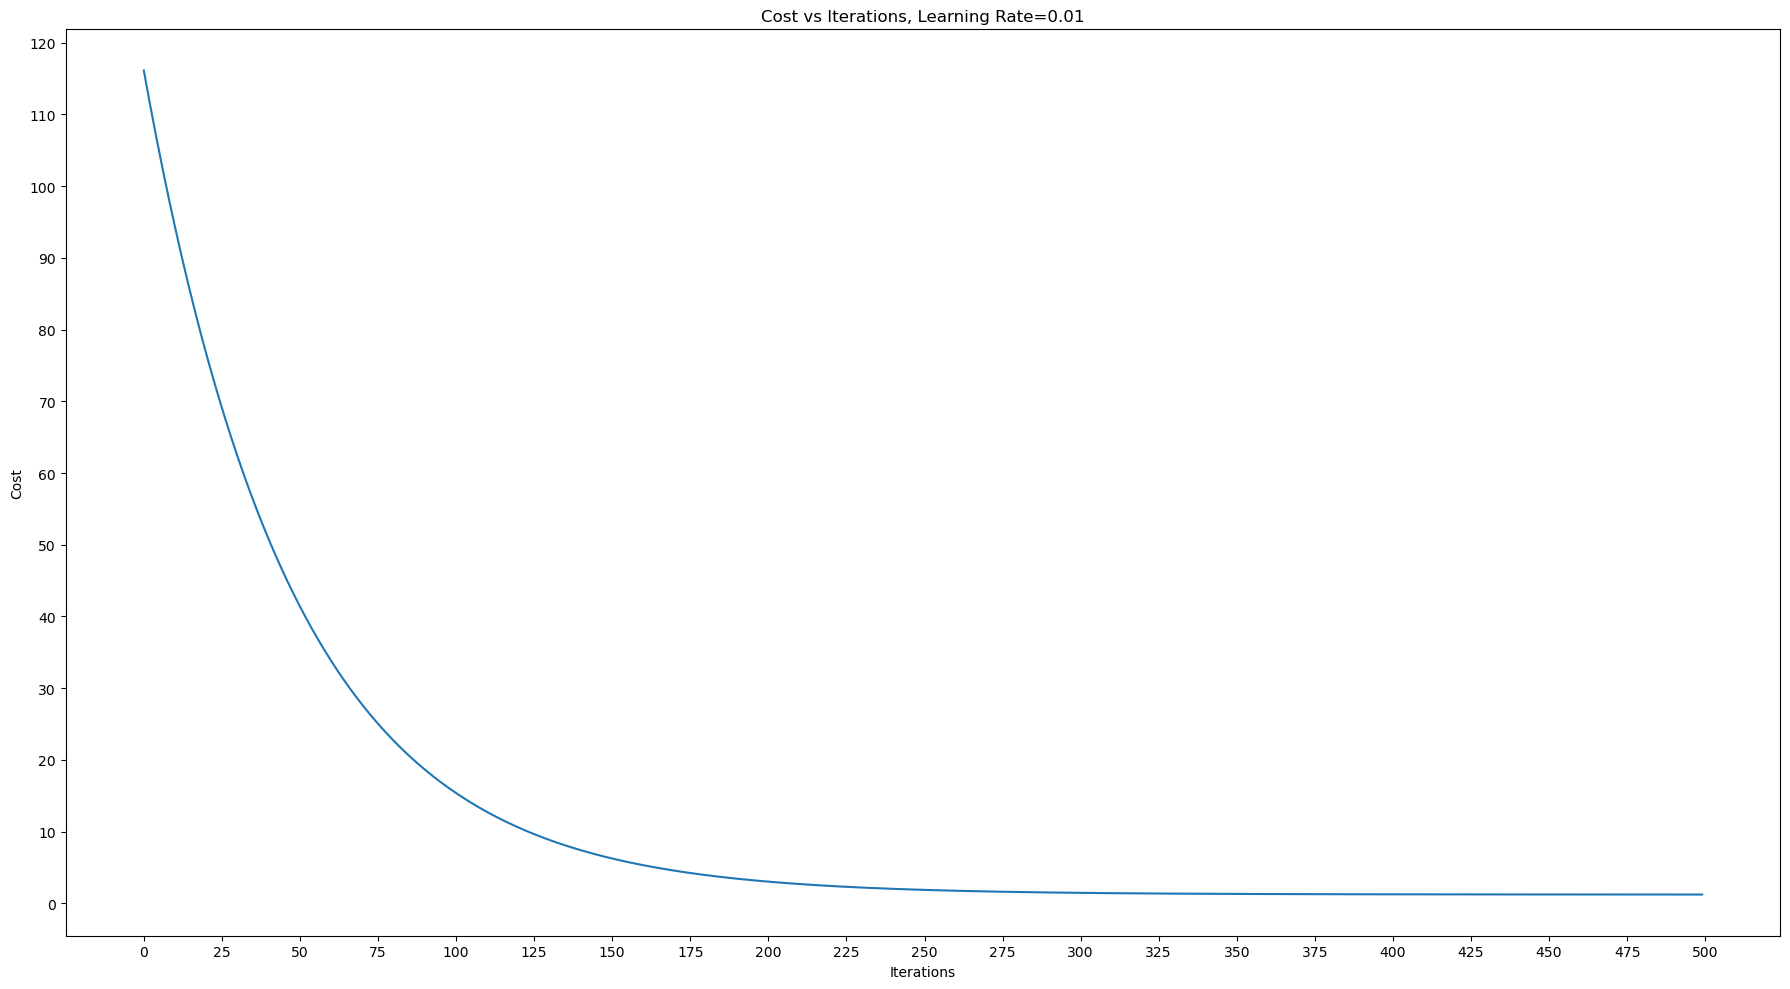

In [401]:
plot_costs(cost_history, learning_rate)

In [402]:
# predict
y_train_pred = predict(x_train, weights)
y_test_pred = predict(x_test, weights)

# calculate metrics
mse_train = compute_cost(y_train, y_train_pred)
mse_test = compute_cost(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# print results
print('TRAIN SET')
print(f'first 5 pred: {y_train_pred[:5]}')
print(f'first 5 real: {y_train[:5].values}')
print(f'mse: {mse_train}')
print(f' r2: {r2_train}')

print('\nTEST SET')
print(f'first 5 pred: {y_test_pred[:5]}')
print(f'first 5 real: {y_test[:5].values}')
print(f'mse: {mse_test}')
print(f' r2: {r2_test}')

TRAIN SET
first 5 pred: [10.55677536 19.49831398 18.30234244 15.17387632  9.90827774]
first 5 real: [12.4 19.7 17.6 15.5 10.1]
mse: 1.2240541662593152
 r2: 0.9068686937942326

TEST SET
first 5 pred: [ 9.94524121  7.34623555  6.92516778 24.07164857 11.96124694]
first 5 real: [11.3  8.4  8.7 25.4 11.7]
mse: 1.9831543974225512
 r2: 0.8592784150730425


## 1.

### Plug it into the linear model:
##### <center> h_theta(x) = theta_0 + theta_1*TV + theta_2*Radio + theta_3*Newspaper </center>

In [403]:
bias = weights[0]
tv = weights[1]
radio = weights[2]
newspaper = weights[3]

print(f'weights: \n{weights}')
print(f'\nh_theta(x) = {bias} + {tv}*TV + {radio}*Radio + {newspaper}*Newspaper')

index = 4
sample = data.iloc[index]

print('\nSAMPLE')
print(sample[:4])

print('\nPREDICTION')
h_theta = bias + tv * sample['tv'] + radio * sample['radio'] + newspaper * sample['newspaper']

print(f'pred: {h_theta}')
print(f'real: {data['sales'].iloc[index]}')

weights: 
bias         13.9643833195
tv            3.8001434924
radio         2.9183297586
newspaper     0.0538876590
dtype: float64

h_theta(x) = 13.964383319490329 + 3.800143492358883*TV + 2.918329758649551*Radio + 0.05388765899261673*Newspaper

SAMPLE
bias         1.0000000000
tv           0.3931955073
radio       -0.8395069844
newspaper    1.2785933603
Name: 4, dtype: float64

PREDICTION
pred: 13.07752485541746
real: 12.9


In [404]:
print('SALES WHEN ADS INVESTMENT IS AVERAGE')
print(f'pred: {bias}')
print(f'real: {raw_data['sales'].mean()}')

print('\nSALES WHEN ADS INVESTMENT IS NONE')
no_tv = scale(0, 'tv')
no_radio = scale(0, 'radio')
no_newspaper = scale(0, 'newspaper')

no_ads = np.array([1, no_tv, no_radio, no_newspaper])
no_ads_pred = predict(no_ads, weights)

print(f'pred: {no_ads_pred}')

SALES WHEN ADS INVESTMENT IS AVERAGE
pred: 13.964383319490329
real: 14.0225

SALES WHEN ADS INVESTMENT IS NONE
pred: 2.807442886680257


### What are the optimal weights found by your implemented gradient descent? What are your interpretations regarding the formed linear model?

With a small bias weight of ~13.964383, the model predicts that if no ads were invested, there will only be ~2.807442 in Sales, which is a farcry from the company's average Sales of 14.0225. Hence, the model suggests that there will only be some miniscule Sales if there were no advertisements. 

TV had a weight of ~3.8001434924 which is the highest, followed by radio with ~2.9183297586, and newspaper with a measly ~0.0538876590. This indicates that: 
* for every unit increase in TV (holding others constant), there is a corresponding increase of ~3.8001434924 units in the model's prediction of Sales.  
* for every unit increase in Radio (holding others constant), there is a corresponding increase of ~2.9183297586 units in the model's prediction of Sales.
* and, for every unit increase in Newspaper (holding others constant), there is a corresponding increase of ~0.0538876590 units in the model's prediction of Sales.

The model suggests that TV advertising is the most effective at increasing Sales output, followed by Radio advertising. On the other hand, Newspaper advertising has a negligible effect on Sales output.

## 2.

### Provide a scatter plot of the predicted and real values of both the train and test set.

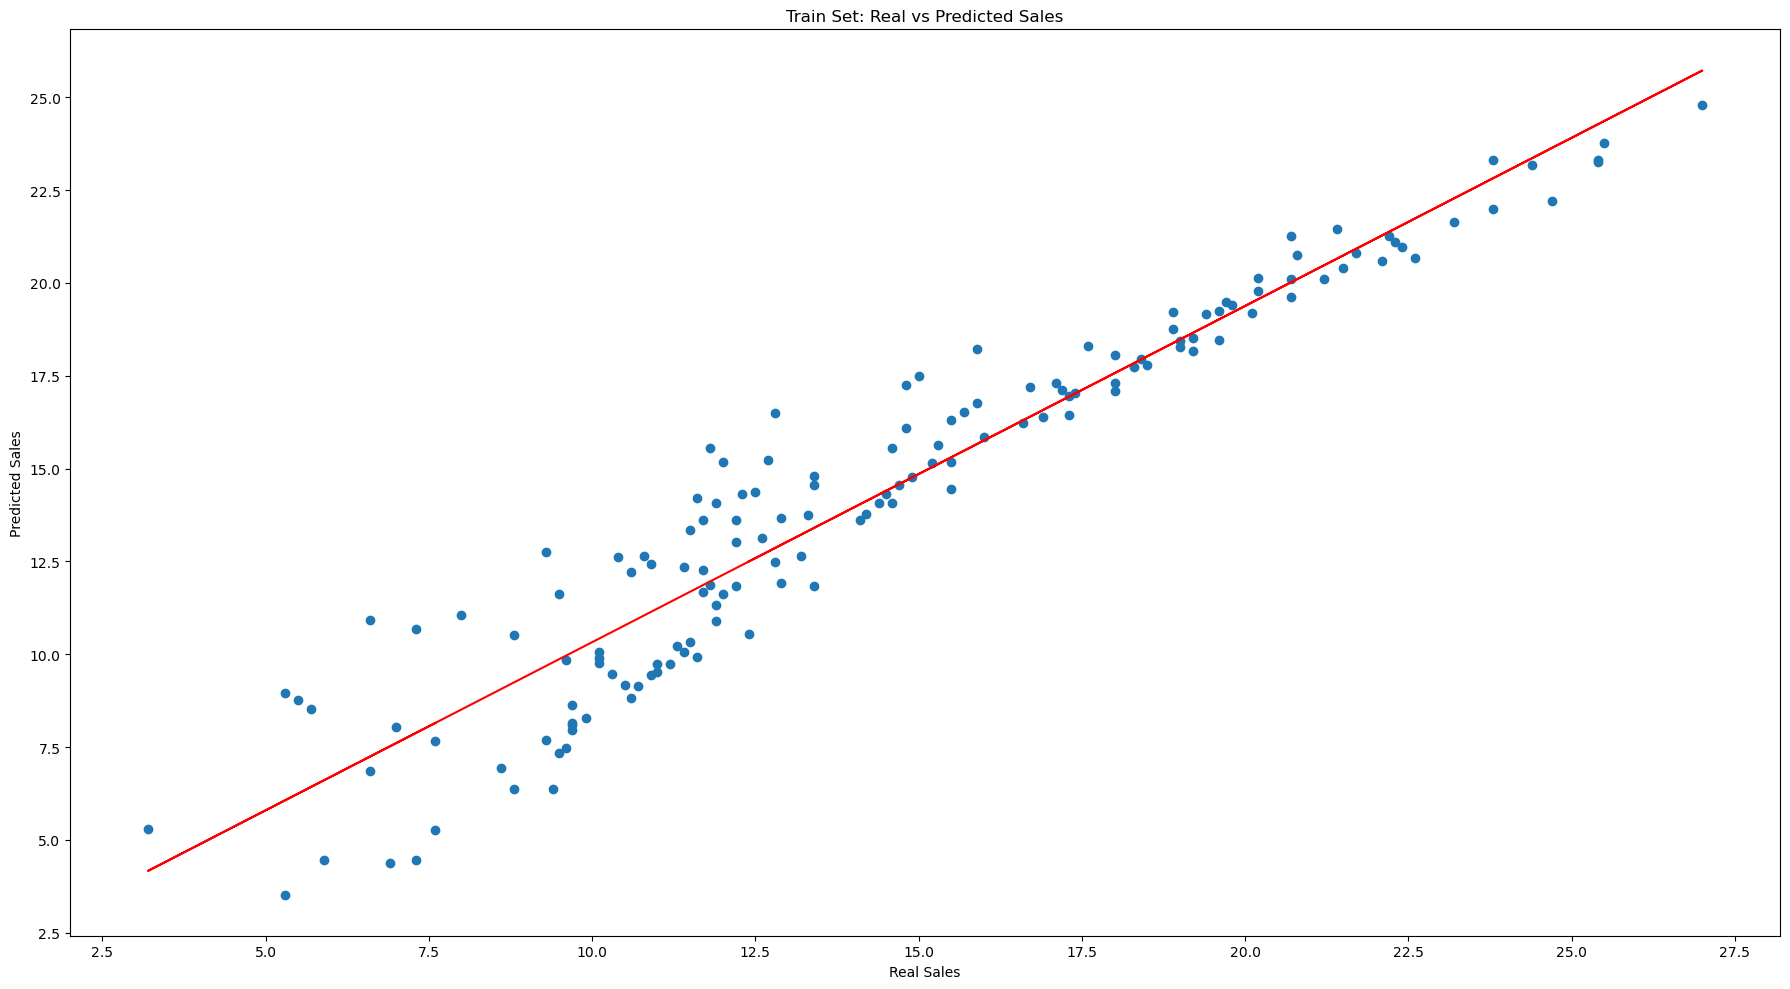

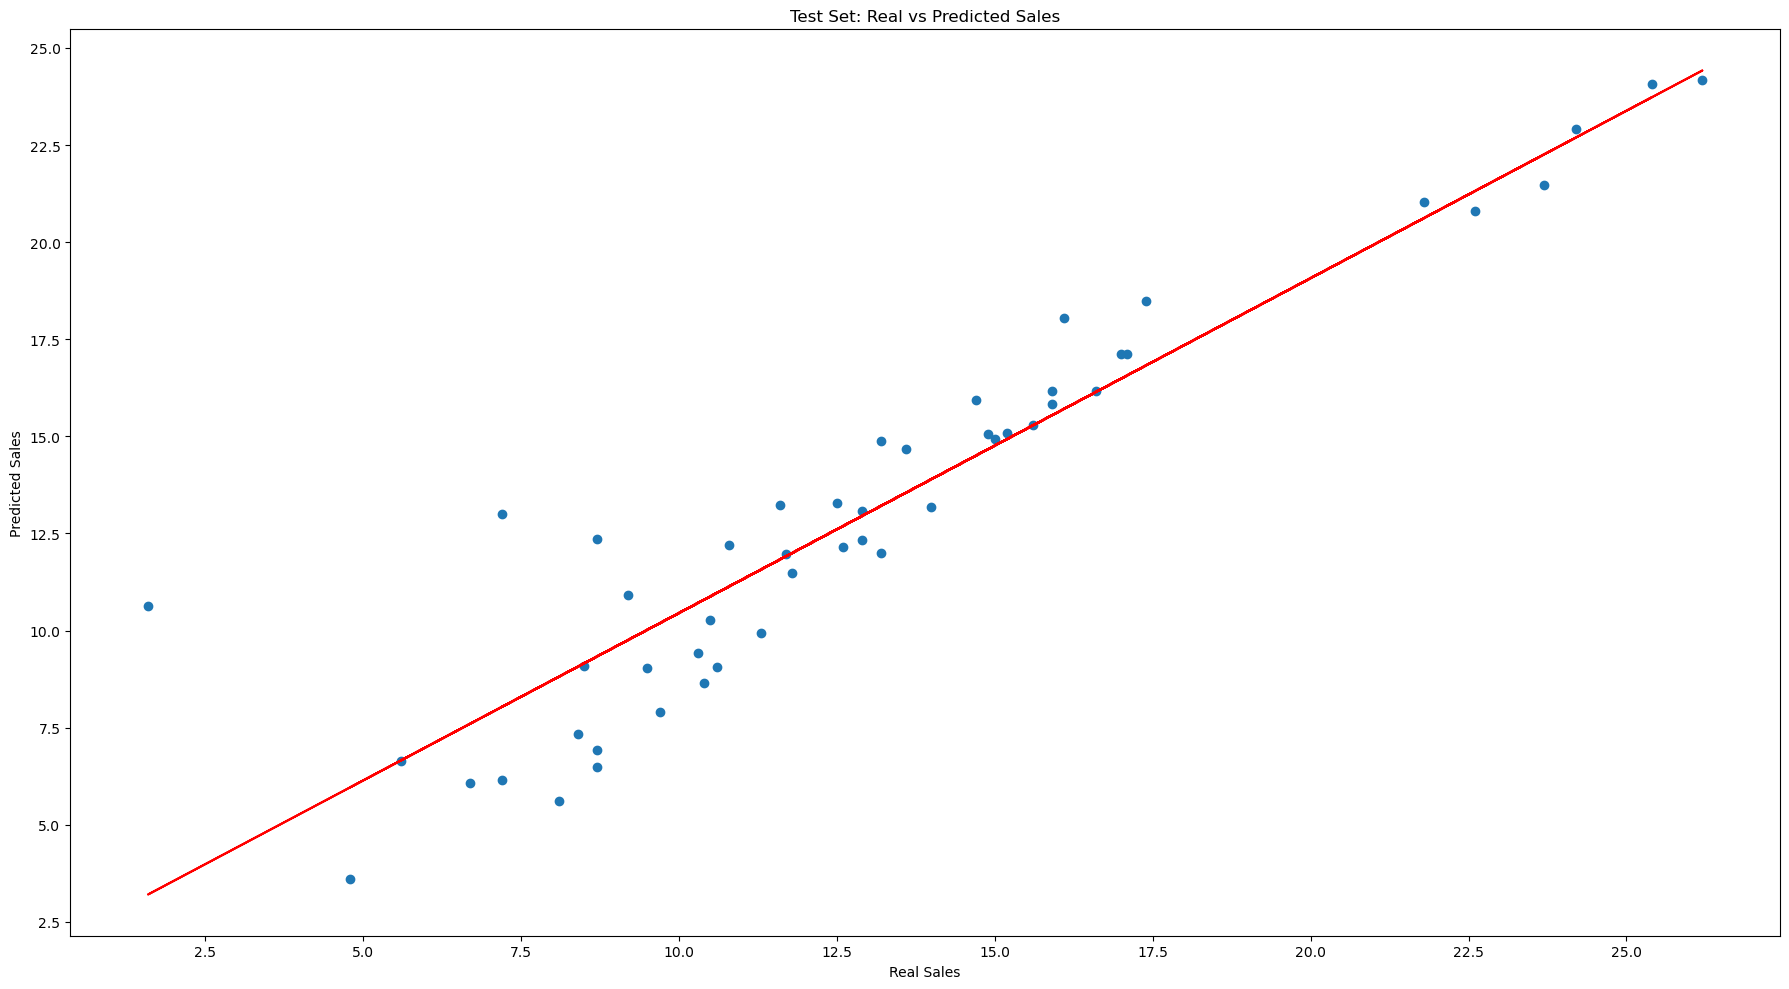

In [405]:
# train 
plt.scatter(y_train, y_train_pred)
plt.title('Train Set: Real vs Predicted Sales')
plt.xlabel('Real Sales')
plt.ylabel('Predicted Sales')
plt.xticks(np.arange(0 - sales_step, max(y_train) + sales_step, step = sales_step))
plt.yticks(np.arange(0 - sales_step, max(y_train_pred) + sales_step, step = sales_step))
m, b = np.polyfit(y_train, y_train_pred, 1)
plt.plot(y_train, m*y_train + b, color='red')
plt.tight_layout()
plt.show()

# test set
plt.scatter(y_test, y_test_pred)
plt.title('Test Set: Real vs Predicted Sales')
plt.xlabel('Real Sales')
plt.ylabel('Predicted Sales')
plt.xticks(np.arange(0 - sales_step, max(y_test) + sales_step, step = sales_step))
plt.yticks(np.arange(0 - sales_step, max(y_test_pred) + sales_step, step = sales_step))
m, b = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, m*y_test + b, color='red')
plt.tight_layout()
plt.show()

### Provide an r2 score (also available in sklearn).

In [406]:
print(f'r2_train: {r2_train}')
print(f'r2_test : {r2_test}')

r2_train: 0.9068686937942326
r2_test : 0.8592784150730425


### Is there a trend? 

There exists a linear positive trend on both plots, which is further illustrated by the diagonal regression lines presented.

The r^2 in the training set indicates that ~90.07% of the variability in response (Sales) is explained by the model using the predictors (TV, Radio, and Newspaper). The model has a strong fit to the training data.

The r^2 in the testing set indicates that ~85.93% of the variability in response (Sales) is explained by the model using the predictors (TV, Radio, and Newspaper). This is only a drop of ~4.14, indicating that the model has robust performance on unseen data and thus has good generalization. Additionally, the existence of a small drop implies that the model is not significantly overfitting.

Both ^2 values are well above 0.75, which is considered as 'very strong positive relationship' between the predicted and real values. This indicates that the model reliably captures the trends in the relationships between the predictors and the response.

## 3. 


### What happens as the number of iterations increase? Show your data and proof. You can alternatively plot your result data for visualization and check until 50000 iterations or more (actually).

In [407]:
"""
Since other parameters must be constant, results are the same at the same nth iteration.
Hence we only need to store the results. This will improve performance.
"""

# gradient descent with history function
def grad_descent_iteration_history(x, y, learning_rate, max_iteration, iteration_history):
    weights = initialize_weights()
    cost_history = []
    
    for num_iteration in range(max_iteration):
        y_hat = predict(x, weights)
        cost = compute_cost(y, y_hat)
        cost_history.append(cost)
        
        gradient = compute_gradient(x, y, y_hat)
        weights = update_weights(weights, gradient, learning_rate)
        
        iteration_history['num_iterations'].append(num_iteration+1)
        iteration_history['weights'].append(weights)
        iteration_history['cost'].append(cost)
    
    # calculate metrics
    for weights in iteration_history['weights']:
        y_train_pred = predict(x_train, weights)
        y_test_pred = predict(x_test, weights)
        
        mse_train = compute_cost(y_train, y_train_pred)
        mse_test = compute_cost(y_test, y_test_pred)
        
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        iteration_history['mse_train'].append(mse_train)
        iteration_history['mse_test'].append(mse_test)
        iteration_history['r2_train'].append(r2_train)
        iteration_history['r2_test'].append(r2_test)

In [408]:
# store results
iteration_history = {
    'num_iterations': [],
    'weights': [],
    'cost': [],
    'mse_train': [],
    'mse_test': [],
    'r2_train': [],
    'r2_test': []
}

# parameters
learning_rate = 0.01
max_iterations = 50000

# run gradient descent with history
grad_descent_iteration_history(
    x_train, 
    y_train, 
    learning_rate, 
    max_iterations, 
    iteration_history
)

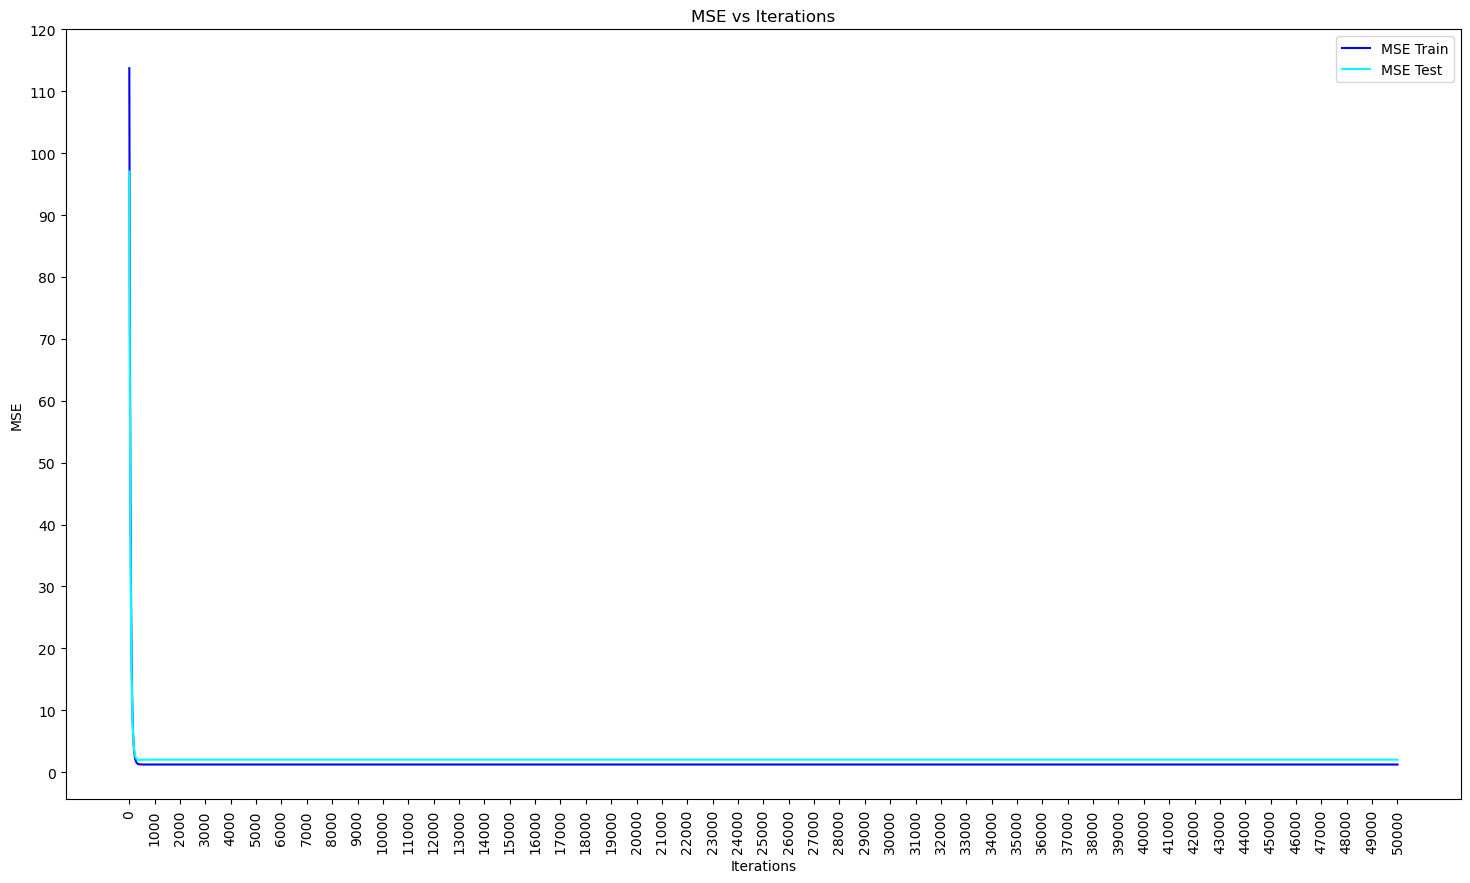

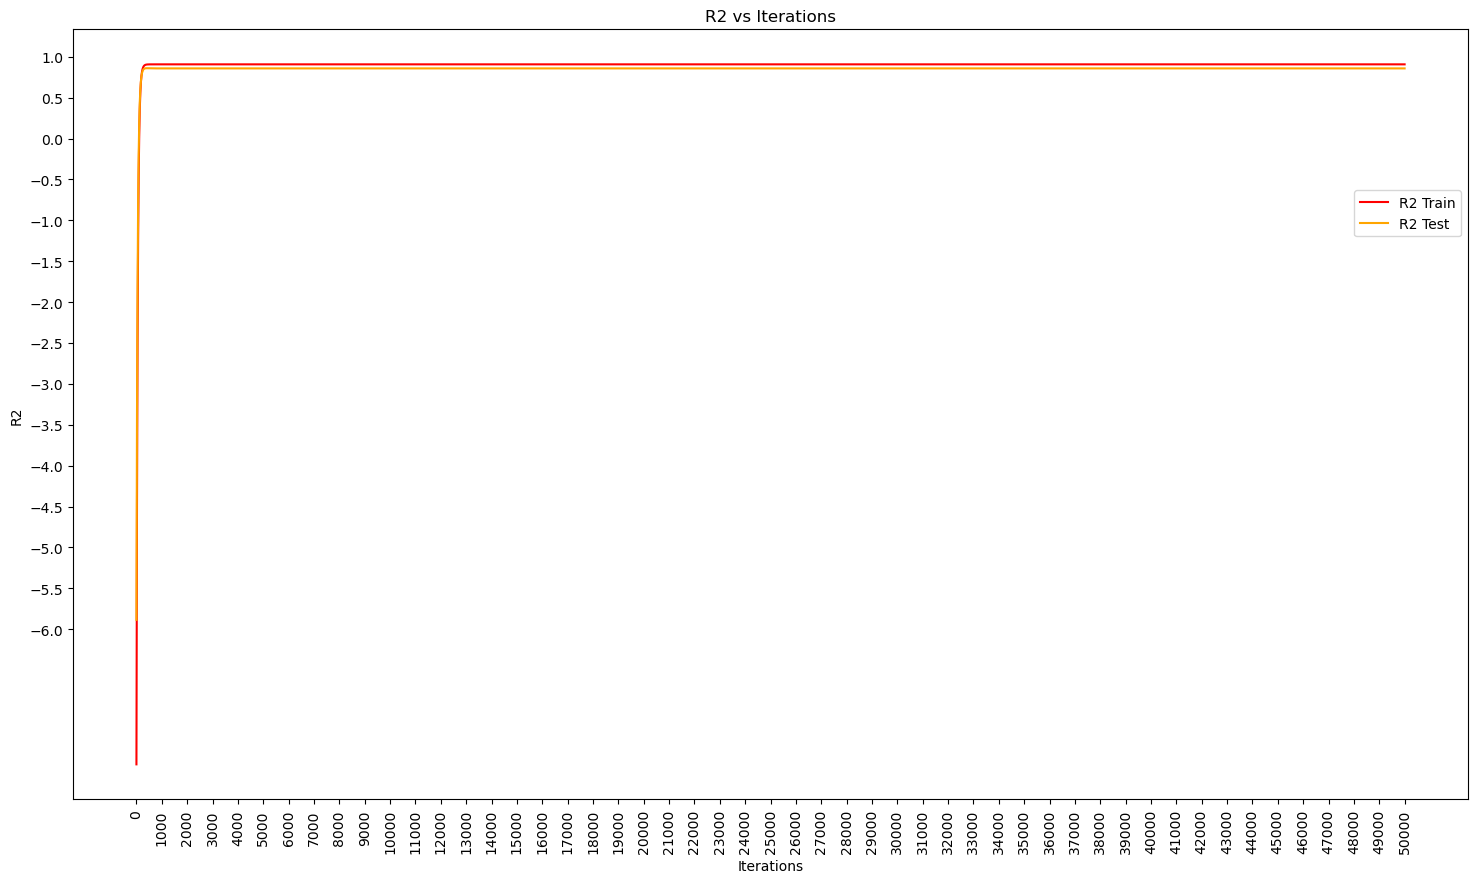

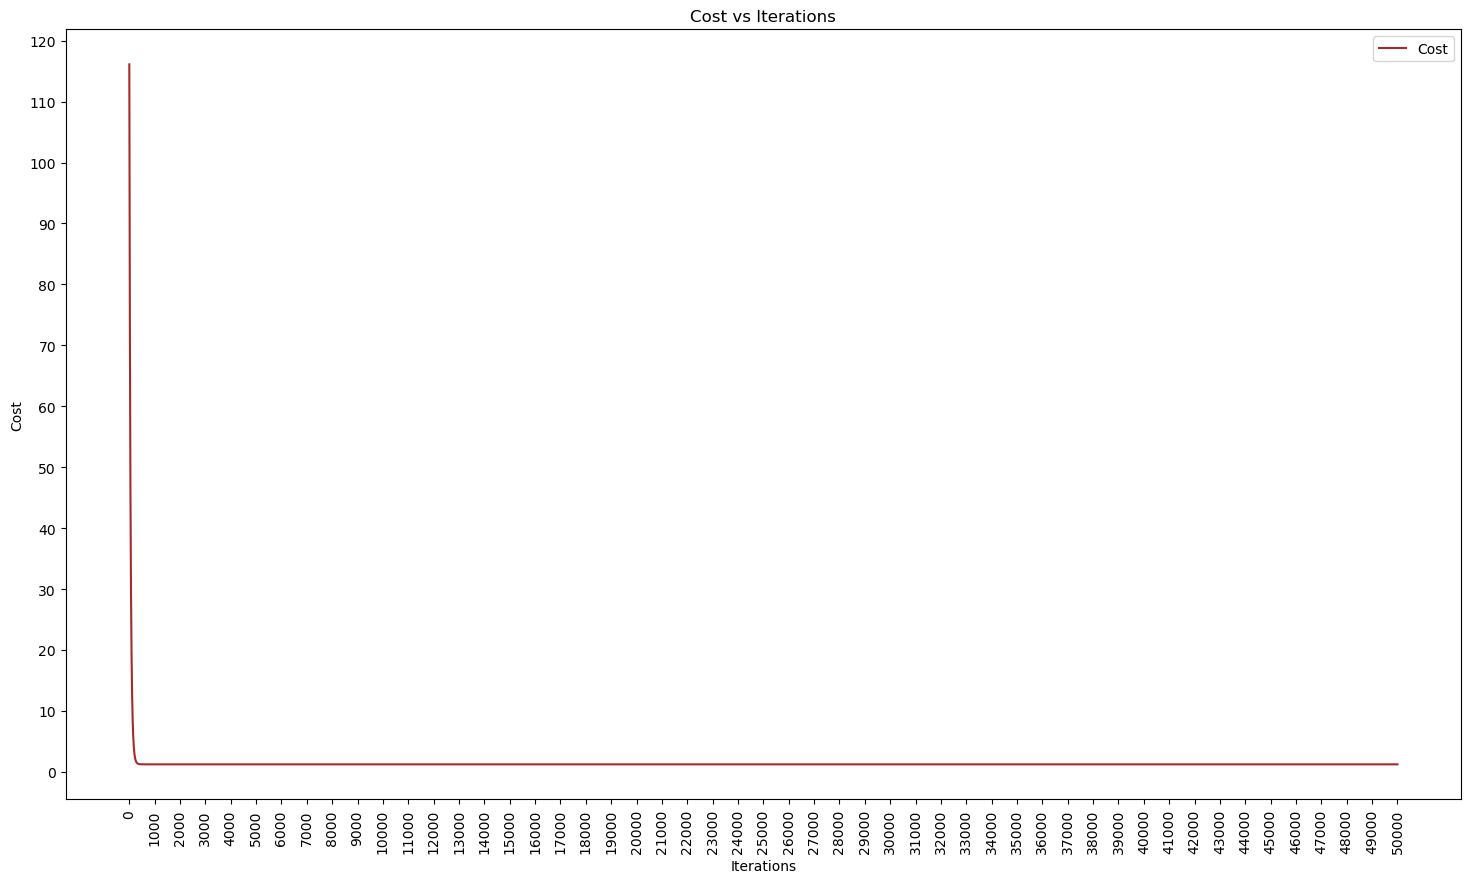

In [409]:
x_ticks = np.arange(0, max_iterations + 1, 1000)

# plot MSE
plt.plot(
    iteration_history['num_iterations'], 
    iteration_history['mse_train'], 
    label = 'MSE Train', 
    color = 'blue'
)
plt.plot(
    iteration_history['num_iterations'], 
    iteration_history['mse_test'], 
    label = 'MSE Test', 
    color = 'cyan'
)
plt.title('MSE vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('MSE')
y_ticks_max = max([max(iteration_history['mse_test']), max(iteration_history['mse_train'])]) + mse_step
plt.xticks(x_ticks, rotation = 90)
plt.yticks(np.arange(0, y_ticks_max, step = mse_step))
plt.legend()
# plt.tight_layout()
plt.show()

# plot R2
plt.plot(
    iteration_history['num_iterations'], 
    iteration_history['r2_train'], 
    label = 'R2 Train', 
    color = 'red'
)
plt.plot(
    iteration_history['num_iterations'], 
    iteration_history['r2_test'], 
    label = 'R2 Test', 
    color = 'orange'
)
plt.title('R2 vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('R2')
plt.xticks(x_ticks, rotation = 90)
plt.yticks(np.arange(round(min(iteration_history['r2_test']) - r2_step), 1 + r2_step, step = r2_step))
plt.legend(bbox_to_anchor = (1,0.8))
# plt.tight_layout()
plt.show()

# plot Cost
plt.plot(
    iteration_history['num_iterations'], 
    iteration_history['cost'], 
    label = 'Cost', 
    color = 'brown'
)
plt.title('Cost vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
y_ticks_max = max(iteration_history['cost']) + mse_step
plt.xticks(x_ticks, rotation=90)
plt.yticks(np.arange(0, y_ticks_max, step = mse_step))
plt.legend()
# plt.tight_layout()
plt.show()

In [410]:
# create dataframe for display
iteration_df = pd.DataFrame({
    'num_iterations': iteration_history['num_iterations'],
    'bias': [w[0] for w in iteration_history['weights']],
    'tv': [w[1] for w in iteration_history['weights']],
    'radio': [w[2] for w in iteration_history['weights']],
    'newspaper': [w[3] for w in iteration_history['weights']],
    'cost': iteration_history['cost'],
    'mse_train': iteration_history['mse_train'],
    'mse_test': iteration_history['mse_test'],
    'r2_train': iteration_history['r2_train'],
    'r2_test': iteration_history['r2_test']
})
iteration_df

,num_iterations,bias,tv,radio,newspaper,cost,mse_train,mse_test,r2_train,r2_test
0,1,0.1435133333,0.0497665291,0.0313489456,0.0078822077,116.1237000000,113.7246785861,97.0369332246,-7.6526627305,-5.8855914888
1,2,0.2855549671,0.0989071311,0.0623388680,0.0155997780,113.7246785861,111.3760981755,95.0548120734,-7.4739726305,-5.7449432214
2,3,0.4261400538,0.1474294750,0.0929741177,0.0231553853,111.3760981755,109.0768906602,93.1141447216,-7.2990390328,-5.6072364519
3,4,0.5652835891,0.1953411372,0.1232589906,0.0305516644,109.0768906602,106.8260107152,91.2140582914,-7.1277824045,-5.4724092421
4,5,0.7030004137,0.2426496029,0.1531977284,0.0377912112,106.8260107152,104.6224353084,89.3536984460,-6.9601249089,-5.3404009697
...,...,...,...,...,...,...,...,...,...,...
49995,49996,14.0514579961,3.7915245422,2.9545696683,0.0253215296,1.2194587467,1.2194587467,2.0062487615,0.9072183331,0.8576396745
49996,49997,14.0514579961,3.7915245422,2.9545696683,0.0253215296,1.2194587467,1.2194587467,2.0062487615,0.9072183331,0.8576396745
49997,49998,14.0514579961,3.7915245422,2.9545696683,0.0253215296,1.2194587467,1.2194587467,2.0062487615,0.9072183331,0.8576396745
49998,49999,14.0514579961,3.7915245422,2.9545696683,0.0253215296,1.2194587467,1.2194587467,2.0062487615,0.9072183331,0.8576396745


In [411]:
# convergence functions
def find_convergence(metric, history):
    conv_threshold = 1e-6
    conv_iteration = None

    for i in range(1, len(history[metric])):
        if abs(history[metric][i - 1] - history[metric][i]) < conv_threshold:
            conv_iteration = i
            break

    return conv_iteration

In [412]:
# find convergence for all metrics, show in a df
metrics = ['cost', 'mse_train', 'mse_test', 'r2_train', 'r2_test']

convergence_values = {
    'metric': [],
    'iteration': []
}

for metric in metrics:
    convergence_iteration = find_convergence(metric, iteration_history)
    convergence_values['metric'].append(metric)
    convergence_values['iteration'].append(convergence_iteration)

convergence_df = pd.DataFrame(convergence_values)
convergence_df

,metric,iteration
0,cost,739
1,mse_train,738
2,mse_test,414
3,r2_train,599
4,r2_test,412


### What happens to the error, r2, and cost as the number of iterations increase? 

The graphs illustrate that as the number of iterations increase, the smaller the difference between each metric and their predecessor. We can also see that the model has hit convergence for all its metrics. Cost convergence was hit at iteration 739, mse_train convergence was hit at iteration 738, mse_test convergence was hit at iteration 414, r2_train convergence was hit at iteration 599, and r2_test convergence was hit at iteration 412. Hitting convergence indicates that the model will receive negligent improvement, which I defined as less than 0.00001 difference, with more iterations in training. Note that cost converges at the iteration after mse_test converges. This is because cost is the mse measured before weights are updated, and mse_train is the mse measured afterwards.

With the convergences found from my model, I determine my optimal number of iterations to be 600 since that was roughly when r2_train converged. I chose r2_train as my basis because I want a high coefficient of determination since it indicates the level of fit for the train set data. Test set data is unpredictable hence it is not a good basis. Additionally, according to Kumar (2023), the r^2 metric is more recommended when determining performance of a regression model.

Note that there were some negative r2 values in the graph. This means that during those iterations, the model performed worse than a horizontal line. A possible reason for this is the initial weights of 0.

Kumar, A. (2023 Dec 29). *Mean Squared Error or R-Squared – Which one to use?* https://vitalflux.com/mean-square-error-r-squared-which-one-to-use

## 4. 

### Once you determine the optimal number of iterations, check the effect on the cost and error as you change the learning rate. The common learning rates in machine learning include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE PLOT.

In [413]:
# store results
lr_history = {}

# parameters
num_iterations = 600
learning_rates = [1.5, 1, 0.2, 0.1, 0.01, 0.001, 0.0001, 0.00001]

for lr in learning_rates:
    # store results
    lr_history[lr] = {
        'num_iterations': [],
        'weights': [],
        'cost': [],
        'mse_train': [],
        'mse_test': [],
        'r2_train': [],
        'r2_test': []
    }
    
    # run gradient descent with history
    grad_descent_iteration_history(
        x_train,
        y_train,
        lr,
        num_iterations,
        lr_history[lr]
    )

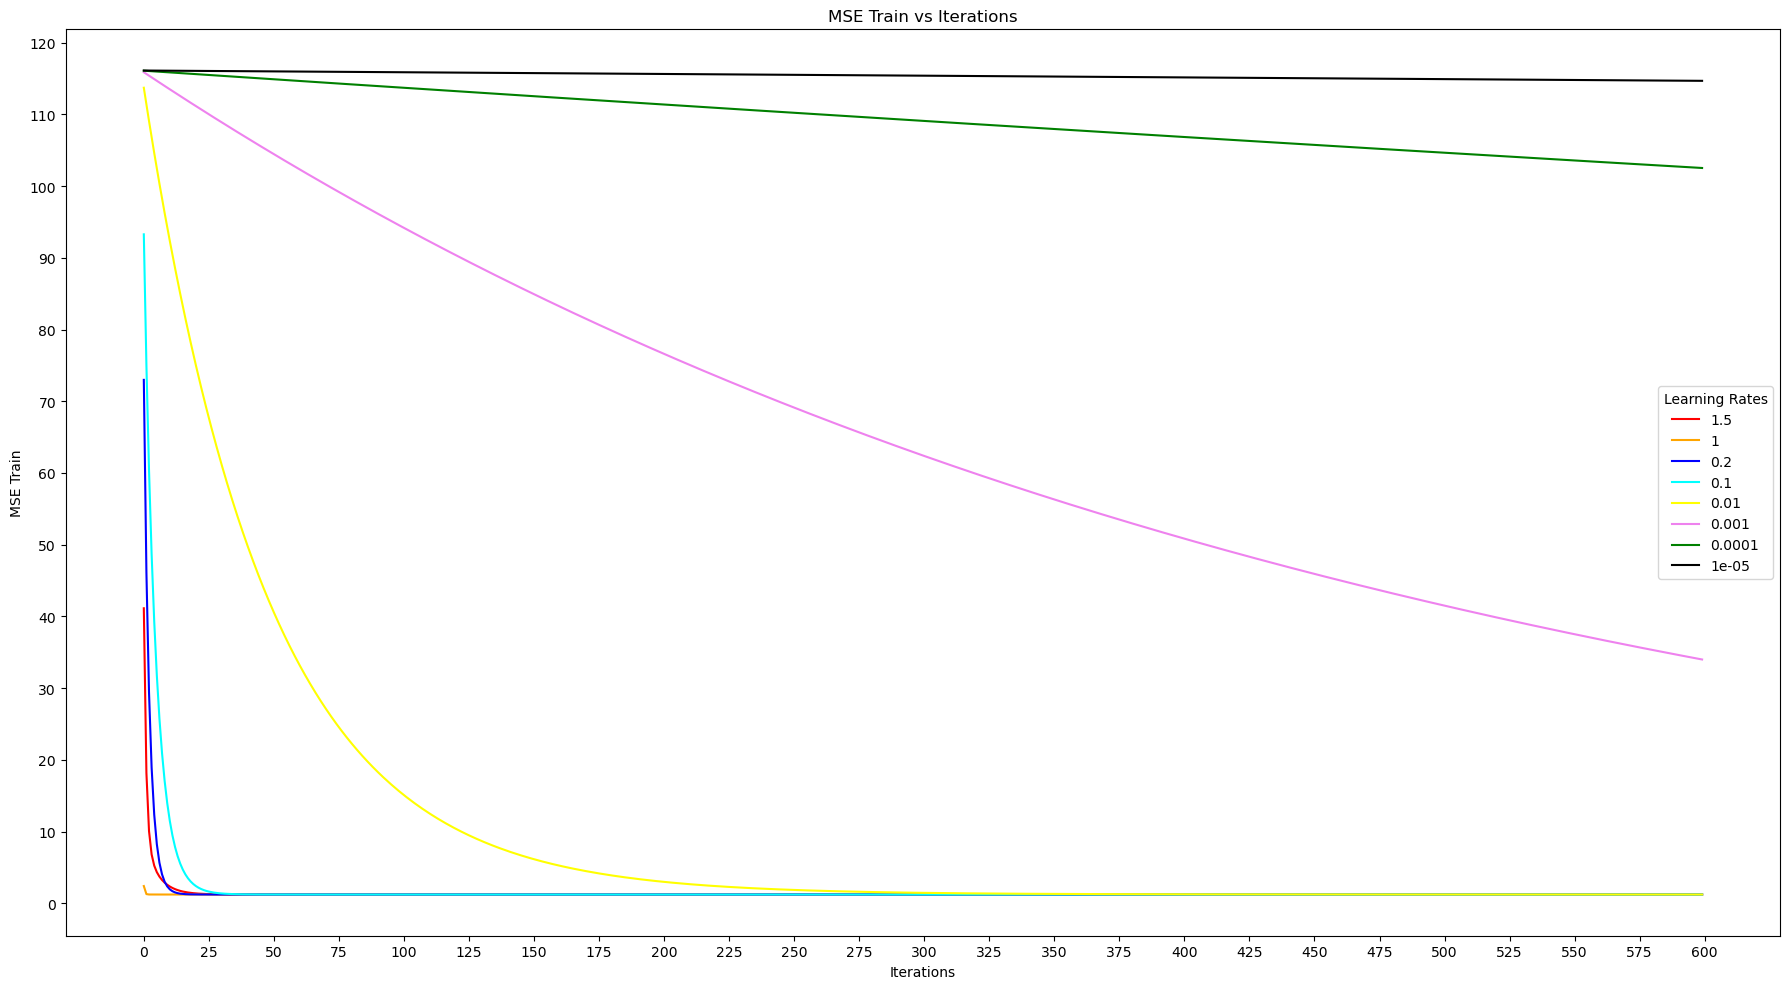

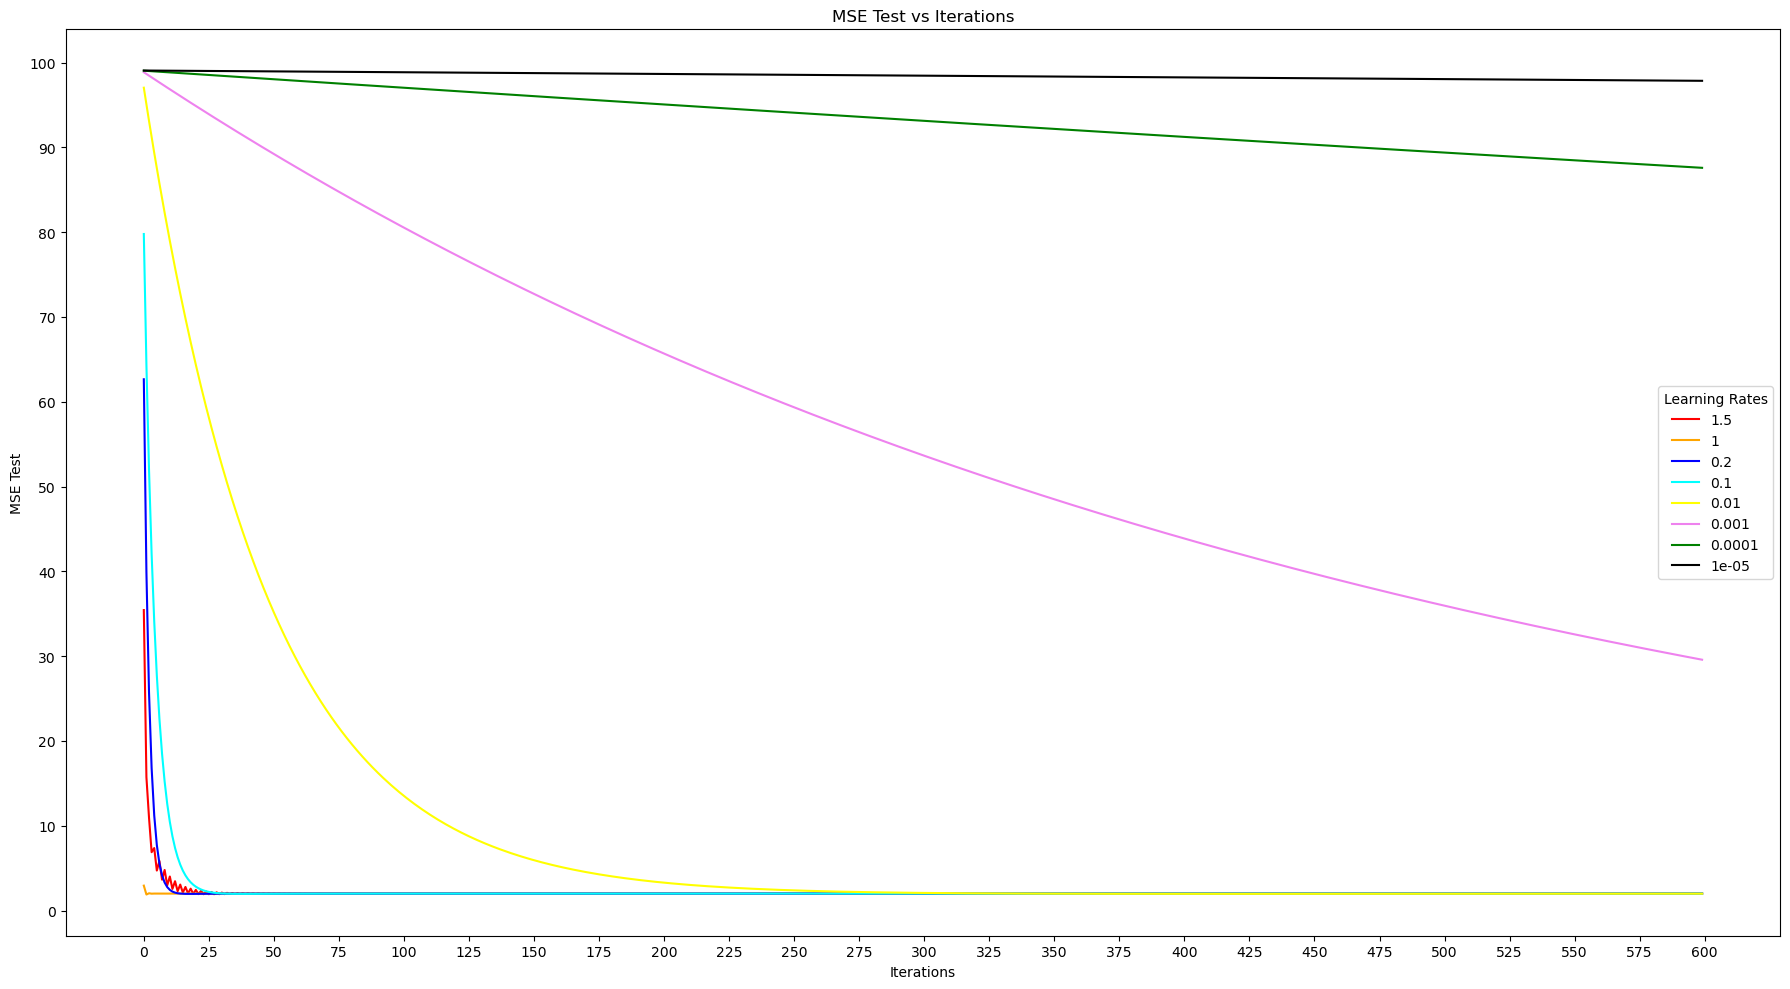

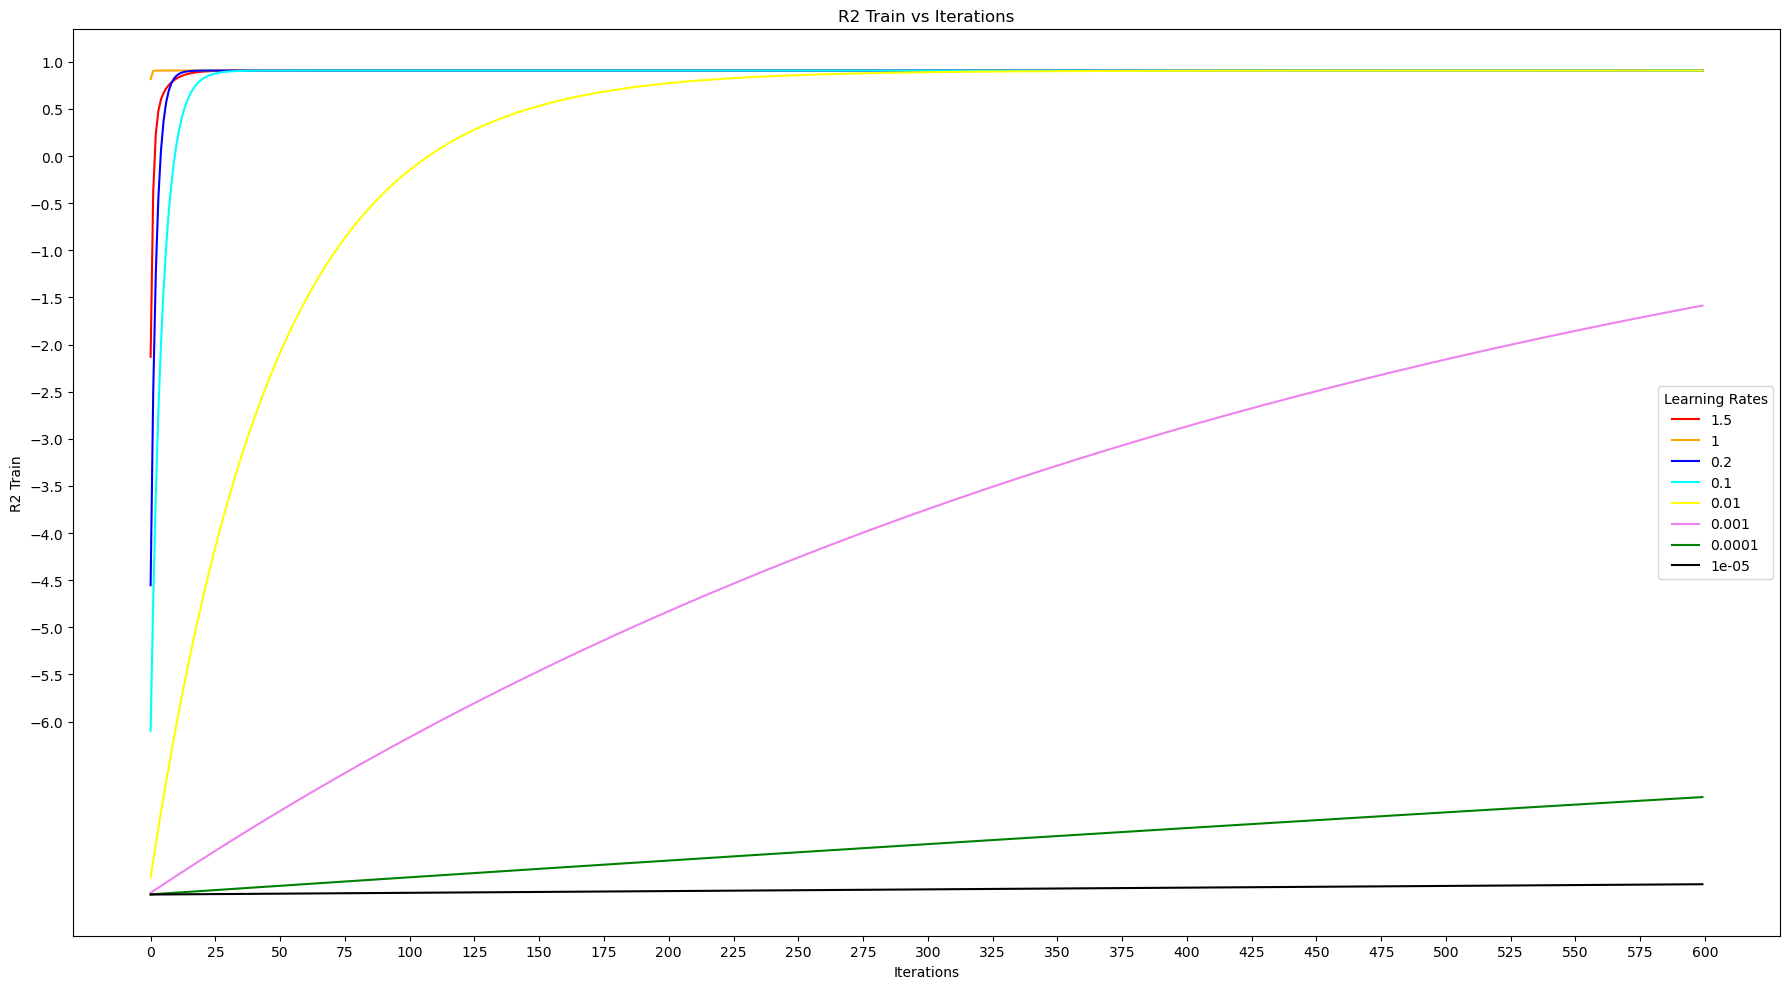

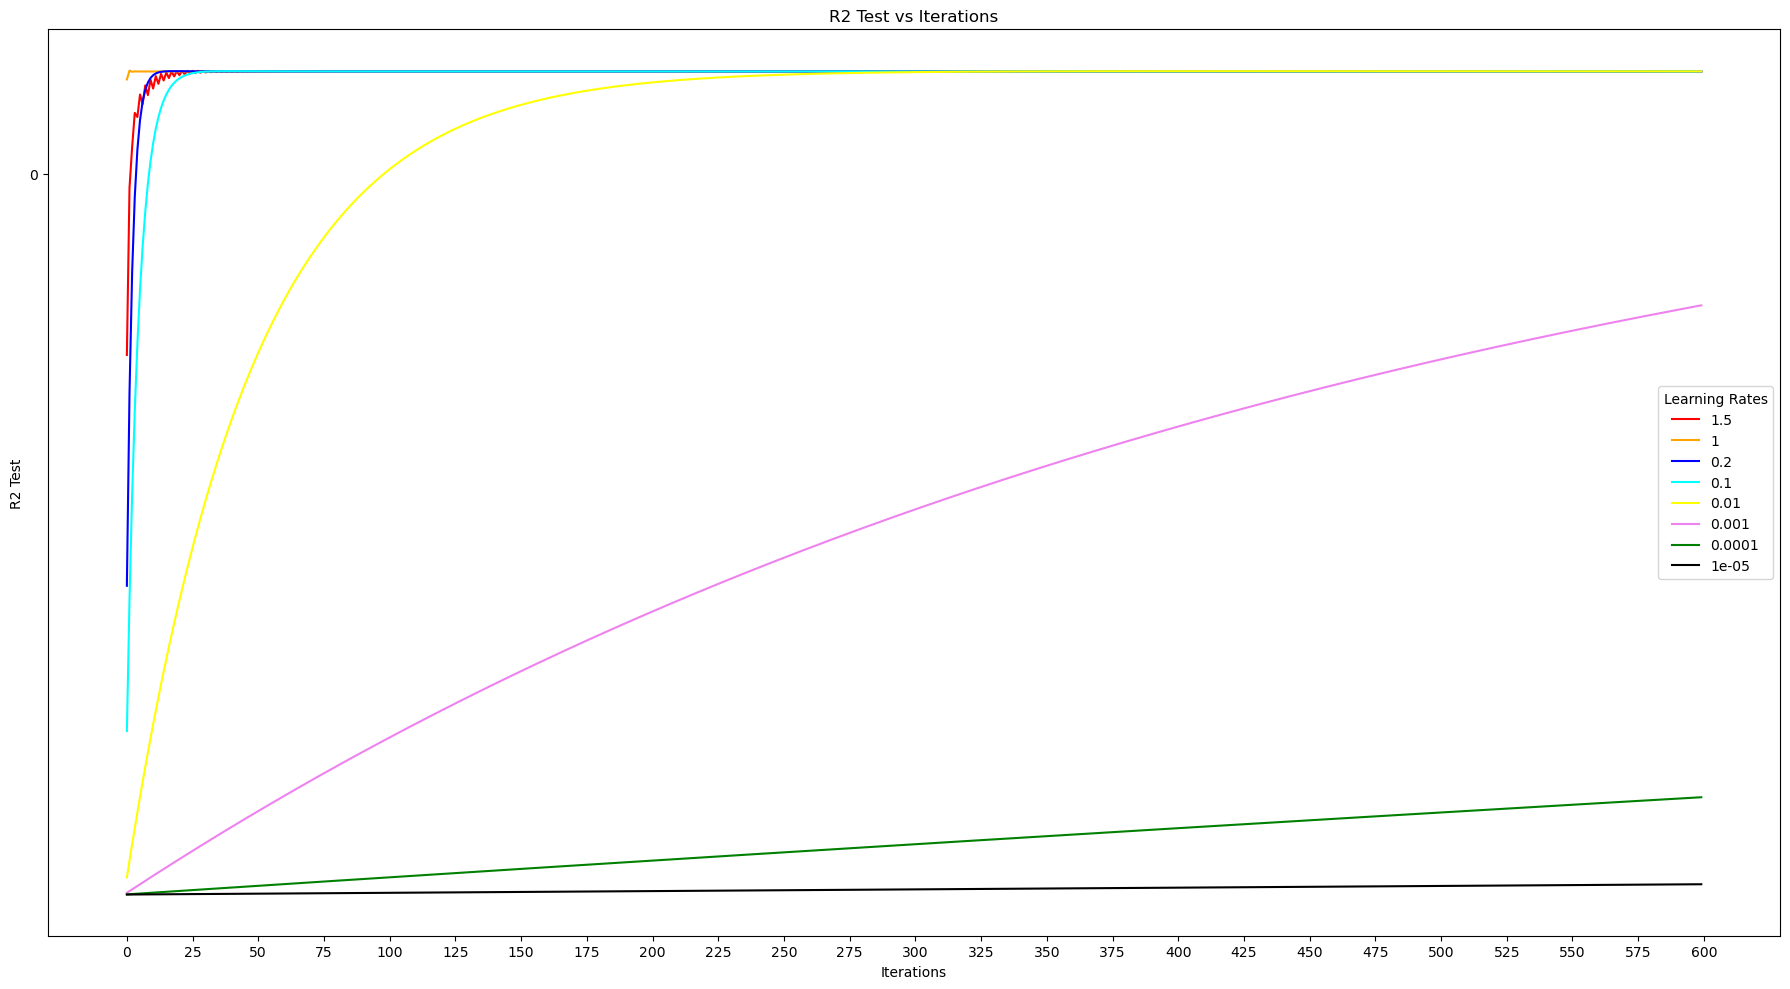

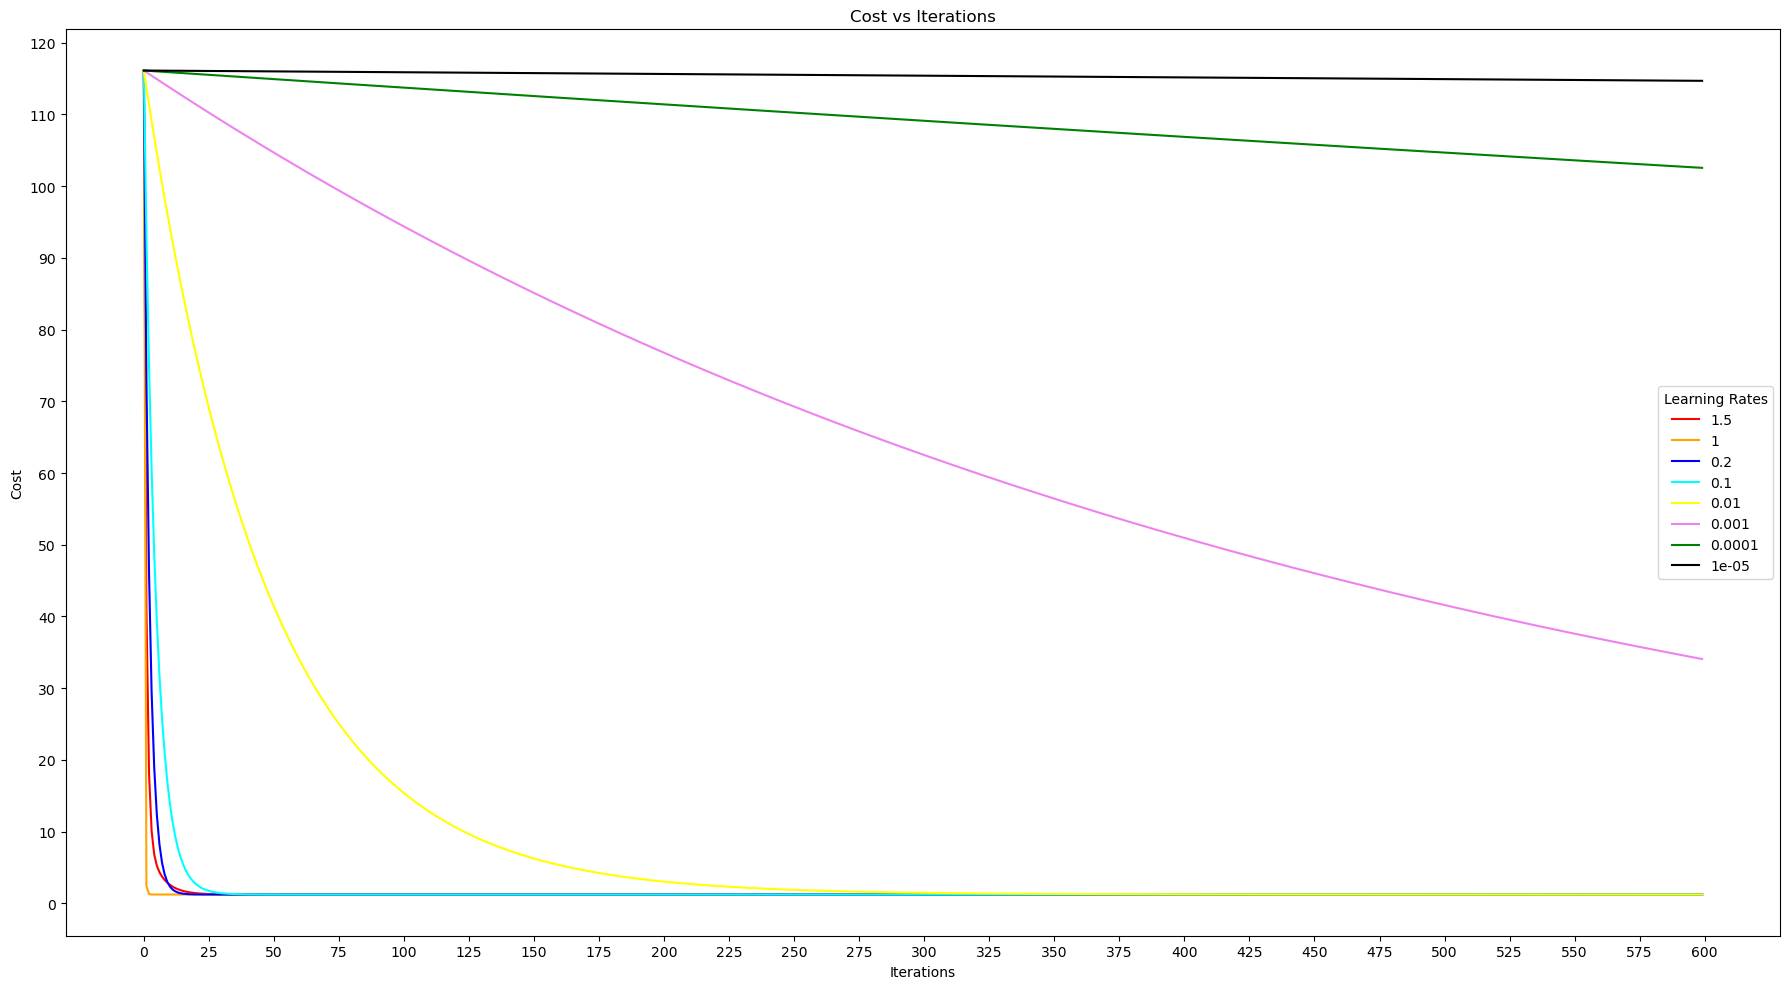

In [414]:
colors = ['red', 'orange', 'blue', 'cyan', 'yellow', 'violet', 'green', 'black']

# plot mse_train for each learning rate
for i in range (len(learning_rates)):
    plt.plot(
        range(num_iterations),
        lr_history[learning_rates[i]]['mse_train'],
        label = learning_rates[i],
        color = colors[i]
    )

plt.title('MSE Train vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('MSE Train')
y_ticks_max = max([max(lr_history[lr]['mse_train']) for lr in learning_rates]) + mse_step
plt.xticks(np.arange(0, num_iterations + 1, step = iter_step))
plt.yticks(np.arange(0, y_ticks_max, step = mse_step))
plt.legend(title='Learning Rates')
plt.tight_layout()
plt.show()

# plot mse_test for each learning rate
for i in range (len(learning_rates)):
    plt.plot(
        range(num_iterations),
        lr_history[learning_rates[i]]['mse_test'],
        label = learning_rates[i],
        color = colors[i]
    )

plt.title('MSE Test vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('MSE Test')
y_ticks_max = max([max(lr_history[lr]['mse_test']) for lr in learning_rates]) + mse_step
plt.xticks(np.arange(0, num_iterations + 1, step = iter_step))
plt.yticks(np.arange(0, y_ticks_max, step = mse_step))
plt.legend(title='Learning Rates')
plt.tight_layout()
plt.show()

# plot r2_train for each learning rate
for i in range (len(learning_rates)):
    plt.plot(
        range(num_iterations),
        lr_history[learning_rates[i]]['r2_train'],
        label = learning_rates[i],
        color = colors[i]
    )

plt.title('R2 Train vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('R2 Train')
plt.yticks(np.arange(round(min(iteration_history['r2_test']) - r2_step), 1 + r2_step, step = r2_step))
plt.xticks(np.arange(0, num_iterations + 1, step = iter_step))
plt.legend(title='Learning Rates')
plt.tight_layout()
plt.show()

# plot r2_test for each learning rate
for i in range (len(learning_rates)):
    plt.plot(
        range(num_iterations),
        lr_history[learning_rates[i]]['r2_test'],
        label = learning_rates[i],
        color = colors[i]
    )

plt.title('R2 Test vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('R2 Test')
plt.yticks(np.arange(0, 1.05, step = mse_step))
plt.xticks(np.arange(0, num_iterations + 1, step = iter_step))
plt.legend(title='Learning Rates')
plt.tight_layout()
plt.show()

# plot cost for each learning rate
for i in range (len(learning_rates)):
    plt.plot(
        range(num_iterations),
        lr_history[learning_rates[i]]['cost'],
        label = learning_rates[i],
        color = colors[i]
    )

plt.title('Cost vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
y_ticks_max = max([max(lr_history[lr]['cost']) for lr in learning_rates]) + mse_step
plt.xticks(np.arange(0, num_iterations + 1, step = iter_step))
plt.yticks(np.arange(0, y_ticks_max, step = mse_step))
plt.legend(title='Learning Rates')
plt.tight_layout()
plt.show()

In [415]:
# store final results
lr_metric_values = {
    'learning_rate': [],
    'tv': [],
    'bias': [],
    'radio': [],
    'newspaper': [],
    'cost': [],
    'mse_train': [],
    'mse_test': [],
    'r2_train': [],
    'r2_test': []
}

# take from last iteration
for lr in learning_rates:
    lr_metric_values['learning_rate'].append(lr)
    lr_metric_values['tv'].append(lr_history[lr]['weights'][-1][1])
    lr_metric_values['bias'].append(lr_history[lr]['weights'][-1][0])
    lr_metric_values['radio'].append(lr_history[lr]['weights'][-1][2])
    lr_metric_values['newspaper'].append(lr_history[lr]['weights'][-1][3])
    lr_metric_values['cost'].append(lr_history[lr]['cost'][-1])
    lr_metric_values['mse_train'].append(lr_history[lr]['mse_train'][-1])
    lr_metric_values['mse_test'].append(lr_history[lr]['mse_test'][-1])
    lr_metric_values['r2_train'].append(lr_history[lr]['r2_train'][-1])
    lr_metric_values['r2_test'].append(lr_history[lr]['r2_test'][-1])

# create df for display
learning_rate_df = pd.DataFrame(lr_metric_values)
learning_rate_df

,learning_rate,tv,bias,radio,newspaper,cost,mse_train,mse_test,r2_train,r2_test
0,1.50000,3.7915245422,14.0514579961,2.9545696683,0.0253215296,1.2194587467,1.2194587467,2.0062487615,0.9072183331,0.8576396745
1,1.00000,3.7915245422,14.0514579961,2.9545696683,0.0253215296,1.2194587467,1.2194587467,2.0062487615,0.9072183331,0.8576396745
2,0.20000,3.7915245422,14.0514579961,2.9545696683,0.0253215296,1.2194587467,1.2194587467,2.0062487615,0.9072183331,0.8576396745
3,0.10000,3.7915245422,14.0514579961,2.9545696683,0.0253215296,1.2194587467,1.2194587467,2.0062487615,0.9072183331,0.8576396745
4,0.01000,3.7966241491,14.0197088192,2.9374877654,0.0397728286,1.2201649258,1.2201519155,1.9949034373,0.9071655938,0.8584447213
5,0.00100,2.0927584628,6.4345632190,1.3663310967,0.2548724456,34.0629731321,33.9946813600,29.5852081081,-1.5864615851,-1.0993208500
6,0.00010,0.2876210948,0.8351680502,0.1817949838,0.0444284321,102.5535035502,102.5322543260,87.5883600774,-6.8010949489,-5.2151352750
7,0.00001,0.0297477126,0.0858440775,0.0187450064,0.0046998349,114.6881515280,114.6857701182,97.8479405845,-7.7257867084,-5.9431393233


In [416]:
# store convergence results
lr_conv_values = {
    'learning_rate': [],
    'mse_test_conv': [],
    'mse_train_conv': [],
    'r2_test_conv': [],
    'r2_train_conv': [],
    'cost_conv': []
}

# find convergence for all metrics
for lr in learning_rates:
    lr_conv_values['learning_rate'].append(lr)
    lr_conv_values['mse_test_conv'].append(find_convergence('mse_test', lr_history[lr]))
    lr_conv_values['mse_train_conv'].append(find_convergence('mse_train', lr_history[lr]))
    lr_conv_values['r2_test_conv'].append(find_convergence('r2_test', lr_history[lr]))
    lr_conv_values['r2_train_conv'].append(find_convergence('r2_train', lr_history[lr]))
    lr_conv_values['cost_conv'].append(find_convergence('cost', lr_history[lr]))

# create df for display
lr_conv_df = pd.DataFrame(lr_conv_values)
lr_conv_df

,learning_rate,mse_test_conv,mse_train_conv,r2_test_conv,r2_train_conv,cost_conv
0,1.50000,154.0,73.0,127.0,60.0,74.0
1,1.00000,12.0,7.0,10.0,6.0,8.0
2,0.20000,67.0,42.0,54.0,35.0,43.0
3,0.10000,133.0,84.0,106.0,69.0,85.0
4,0.01000,414.0,NaN,412.0,599.0,NaN
5,0.00100,NaN,NaN,NaN,NaN,NaN
6,0.00010,NaN,NaN,NaN,NaN,NaN
7,0.00001,NaN,NaN,NaN,NaN,NaN


### Provide your analysis.

If we were to ignore learning rate of 1.5, then we would reasonably expect that the higher the learning rate the faster does the model reach convergence. It would make sense as the learning rate is how much the gradient nudges the weights to reach best performance. However, we see that learning rate of 1.5 actually performs worse than all the others in terms of hitting convergence. We could deduce that at a learning rate between 1 and 1.5, the model starts to nudge a little too hard and thus overshoot the point where the weights minimize the cost. Hence, the jagged lines at the plots for test metrics data. This is because as the model overshoots, it corrects itself by going back which then also overshoots continuing the feedback loop. Seeing that the overshooting affects only the test set, the model becomes unrobust along those iterations with oscillating results.

Learning rate 0.01 has reached convergence only for mse_test, r2_test and r2_train, as expected from previous results. On the other hand, the learning rates below it have not reached any convergence. They are too slow to reach the optimal result despite seemingly going towards the same values of convergence as other learning rates.

Learning rates 1, 0.2, and 0.1 have all reached convergence for all metrics. With this, the best learning rate for this model and this data would be 1 since it is the fastest when reaching convergence while arriving at similar weights (bias, tv, radio, newspaper) and metrics (mean squared error, cost, r2) as others. Therefore, it is the most efficient learning rate for this model among those tested.  

## 5.

#### Is there a relationship on the learning rate and the number of iterations?

Learning rate is how large or small are the updates to the weights in response to the cost during training. Number of iterations is the number of times the learning algorithm will train the model. With these definitions, there is a clear relationship between them, especially in regards to finding a convergence point.

A high learning rate may reach the convergence point the fastest as observed by learning rate 1 in #4. Hence, low number of iterations are typically used for these since further iterations would only yield negligent improvements and could risk divergence. However, if learning rate is too high, then it overshoots which actually slows down its progress towards convergence like in the case of learning rate 1.5 in #4. This case illustrates that high learning rates may actually be detrimental in training a model.

On the other hand, low learning rates decrease the chance of the model overshooting since the weights are updated in a gradual pace, potentially increasing the accuracy of the model. However, they require a higher number of iterations to reach convergence. If the learning rate is too small as with case of learning rates 0.001, 0.0001, and 0.00001 in #4, then training could take an incessantly long time and not reach convergence in a timely manner.

This all illustrates the importance of finding the optimal learning rate, which is the learning rate that converges to the optimal solution the fastest. Additionally, this concept further emphasizes the importance of experimentation and analysis when making a machine learning model.

## 6.  

#### Compare the results with the results of ordinary least squares function.

In [417]:
# optimal parameters based on #5
learning_rate = 1
num_iterations = 12

# run gradient descent
weights, cost_history = grad_descent(x_train, y_train, learning_rate, num_iterations)

# predict
gd_y_train_pred = predict(x_train, weights)
gd_y_test_pred = predict(x_test, weights)

In [418]:
# calculate metrics
gd_mse_train = compute_cost(y_train, gd_y_train_pred)
gd_mse_test = compute_cost(y_test, gd_y_test_pred)

gd_r2_train = r2_score(y_train, gd_y_train_pred)
gd_r2_test = r2_score(y_test, gd_y_test_pred)

# print results
print('GRADIENT DESCENT')
print('TRAIN SET')
print(f'first 5 pred: {gd_y_train_pred[:5]}')
print(f'first 5 real: {y_train[:5].values}')
print(f'mse: {gd_mse_train}')
print(f' r2: {gd_r2_train}')

print('\nTEST SET')
print(f'first 5 pred: {gd_y_test_pred[:5]}')
print(f'first 5 real: {y_test[:5].values}')
print(f'mse: {gd_mse_test}')
print(f' r2: {gd_r2_test}')

GRADIENT DESCENT
TRAIN SET
first 5 pred: [10.62420816 19.54192175 18.37463168 15.26284342 10.02487322]
first 5 real: [12.4 19.7 17.6 15.5 10.1]
mse: 1.219458746701358
 r2: 0.9072183330812782

TEST SET
first 5 pred: [10.0494574   7.43052583  6.97152613 24.16378436 12.0021602 ]
first 5 real: [11.3  8.4  8.7 25.4 11.7]
mse: 2.0062486962988646
 r2: 0.8576396791557204


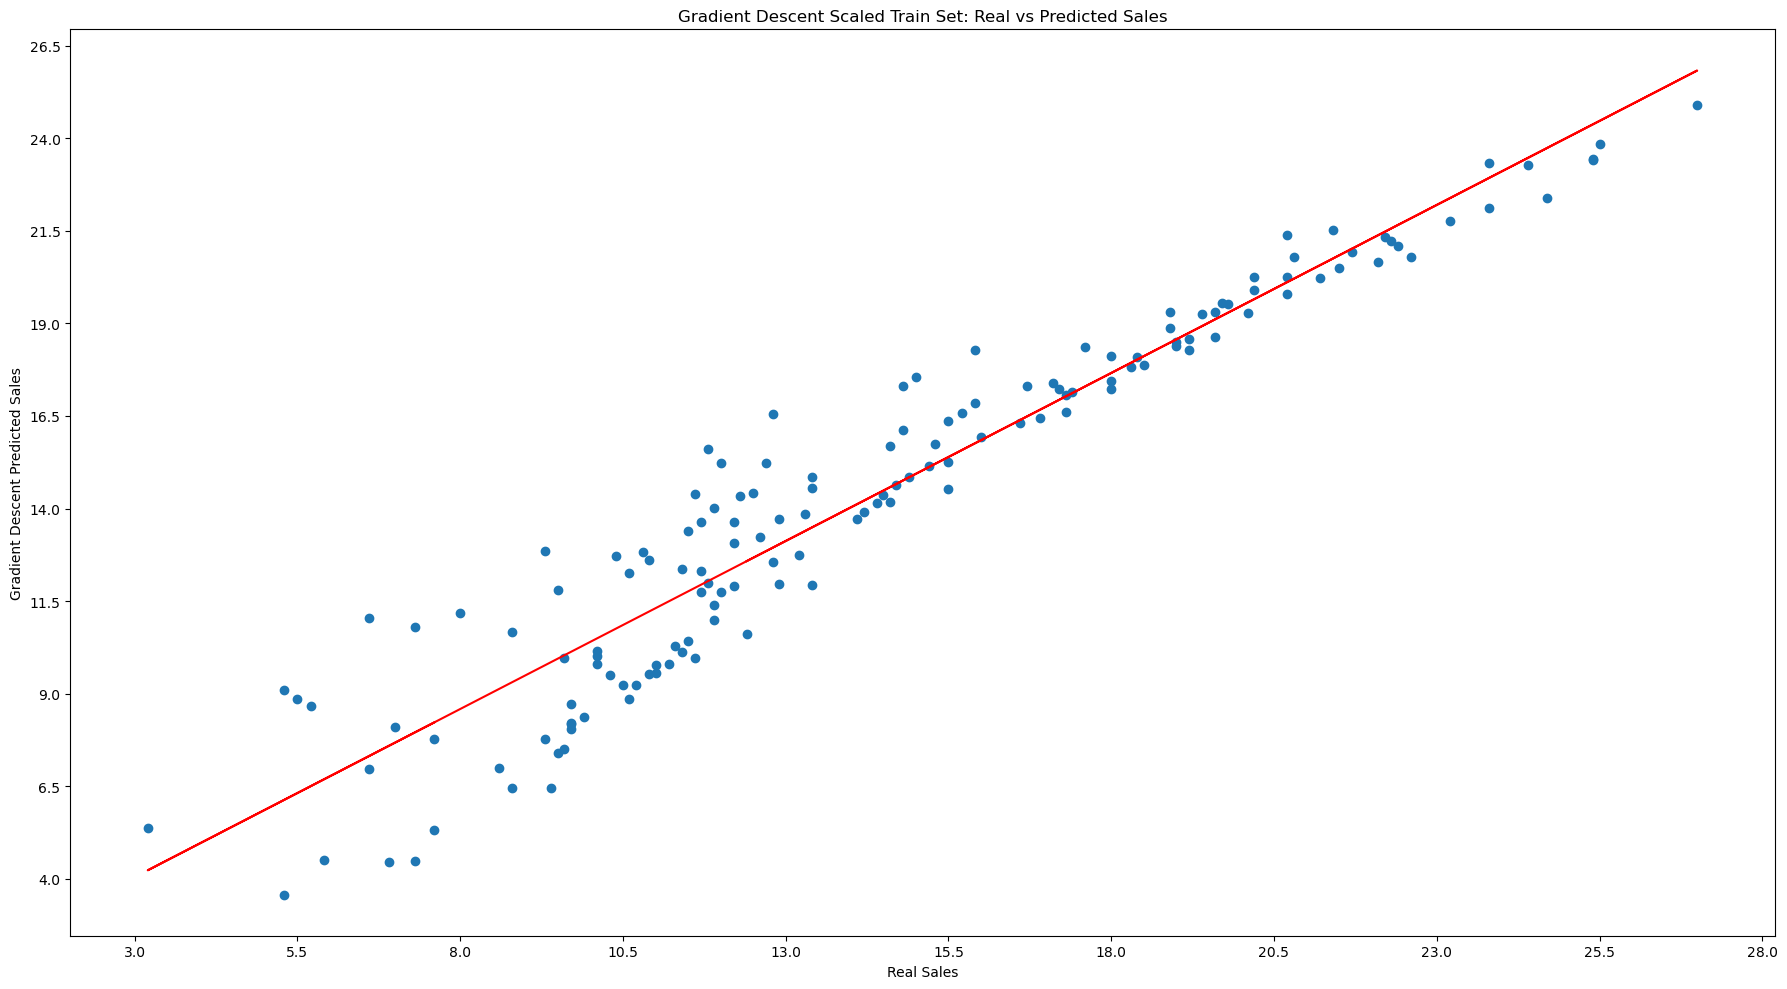

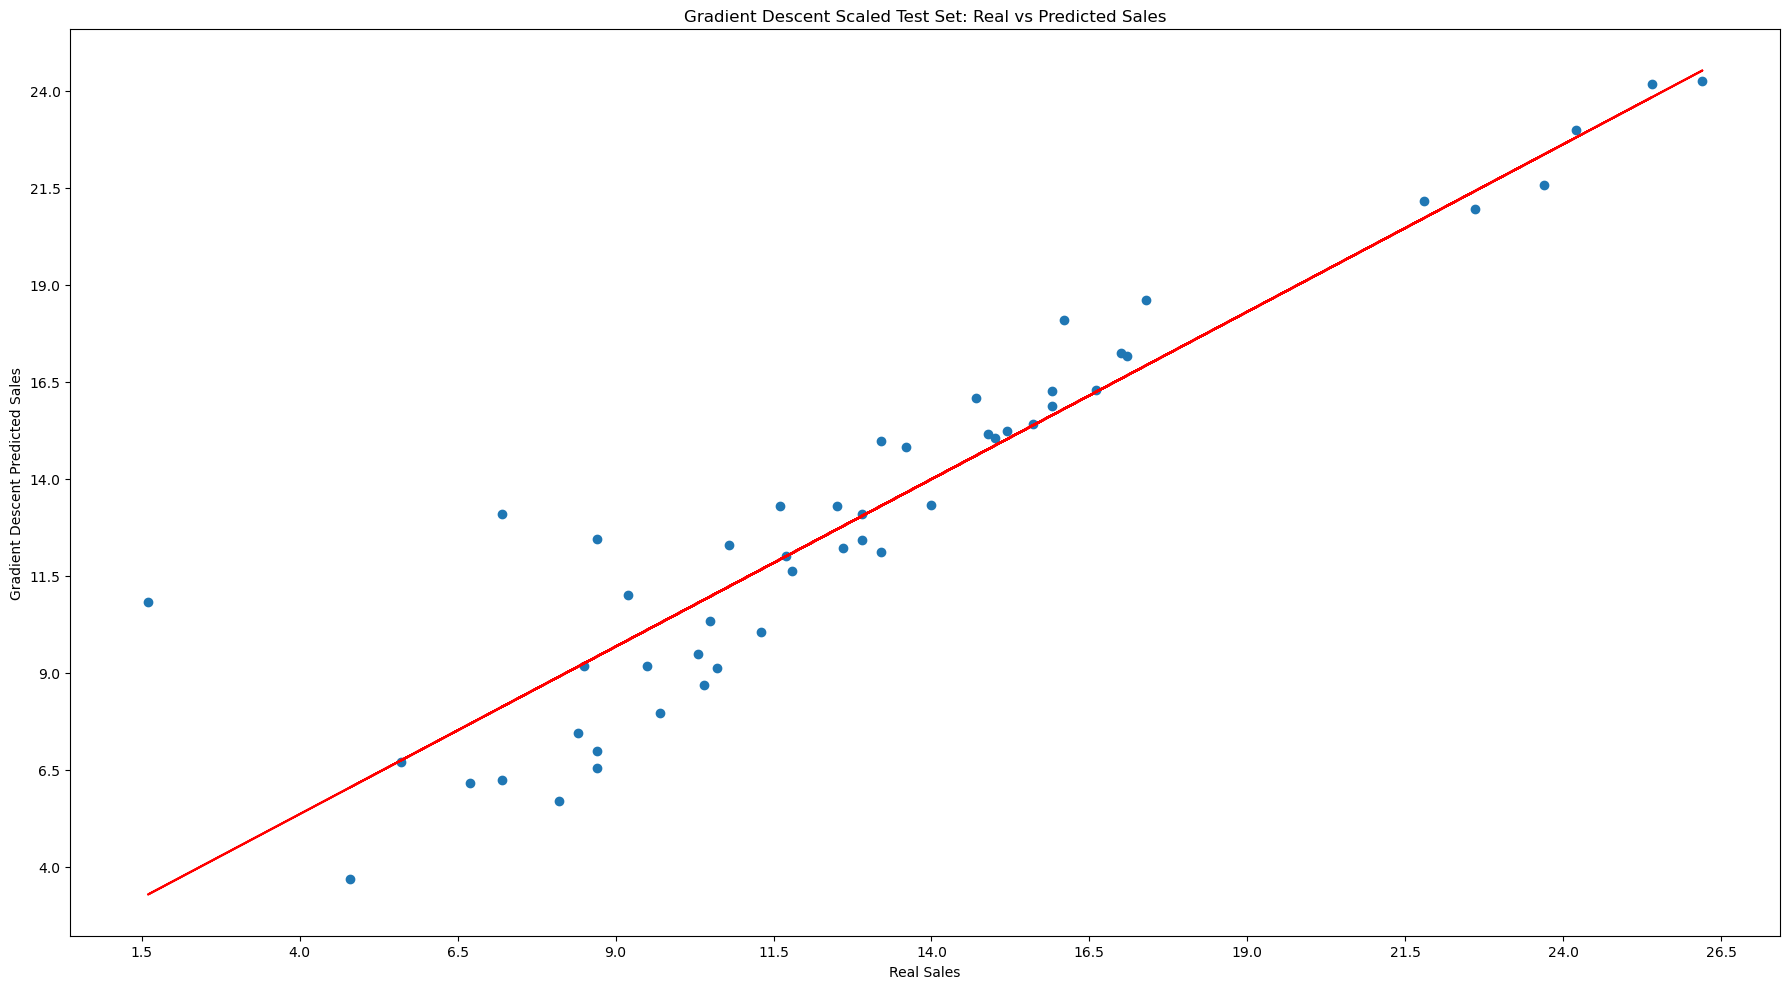

In [419]:
# plot train set
plt.scatter(y_train, gd_y_train_pred)
plt.title('Gradient Descent Scaled Train Set: Real vs Predicted Sales')
plt.xlabel('Real Sales')
plt.ylabel('Gradient Descent Predicted Sales')
plt.xticks(np.arange((round(min(y_train))) - sales_step, (round(max(y_train), 2)) + sales_step, step = sales_step))
plt.yticks(np.arange((round(min(gd_y_train_pred))) - sales_step, (round(max(gd_y_train_pred), 2)) + sales_step, step = sales_step))
m, b = np.polyfit(y_train, gd_y_train_pred, 1)
plt.plot(y_train, m*y_train + b, color='red')
plt.tight_layout()
plt.show()

# plot test set
plt.scatter(y_test, gd_y_test_pred)
plt.title('Gradient Descent Scaled Test Set: Real vs Predicted Sales')
plt.xlabel('Real Sales')
plt.ylabel('Gradient Descent Predicted Sales')
plt.xticks(np.arange((round(min(y_test))) - 0.50, (round(max(y_test), 2)) + sales_step, step = sales_step))
plt.yticks(np.arange((round(min(gd_y_test_pred))) - sales_step, (round(max(gd_y_test_pred), 2)) + sales_step, step = sales_step))
m, b = np.polyfit(y_test, gd_y_test_pred, 1)
plt.plot(y_test, m*y_test + b, color='red')
plt.tight_layout()
plt.show()

In [420]:
from sklearn.linear_model import LinearRegression

# run ols
ols = LinearRegression()
ols.fit(x_train, y_train)

# predict
ols_y_train_pred = ols.predict(x_train)
ols_y_test_pred = ols.predict(x_test)

In [421]:
# calculate metrics
ols_mse_train = compute_cost(y_train, ols_y_train_pred)
ols_mse_test = compute_cost(y_test, ols_y_test_pred)

ols_r2_train = r2_score(y_train, ols_y_train_pred)
ols_r2_test = r2_score(y_test, ols_y_test_pred)

# print results
print('OLS')
print('TRAIN SET')
print(f'first 5 pred: {ols_y_train_pred[:5]}')
print(f'first 5 real: {y_train[:5].values}')
print(f'mse: {ols_mse_train}')
print(f' r2: {ols_r2_train}')

print('\nTEST SET')
print(f'first 5 pred: {ols_y_test_pred[:5]}')
print(f'first 5 real: {y_test[:5].values}')
print(f'mse: {ols_mse_test}')
print(f' r2: {ols_r2_test}')

print(f'weights: {ols.coef_}')
print(f'bias: {ols.intercept_}')

OLS
TRAIN SET
first 5 pred: [10.62420524 19.5419182  18.37463236 15.26284415 10.02487307]
first 5 real: [12.4 19.7 17.6 15.5 10.1]
mse: 1.2194587466954243
 r2: 0.9072183330817297

TEST SET
first 5 pred: [10.0494569   7.43052335  6.97152143 24.16378667 12.00215643]
first 5 real: [11.3  8.4  8.7 25.4 11.7]
mse: 2.006248761458549
 r2: 0.8576396745320893
weights: [0.         3.79152454 2.95456967 0.02532153]
bias: 14.051457996097845


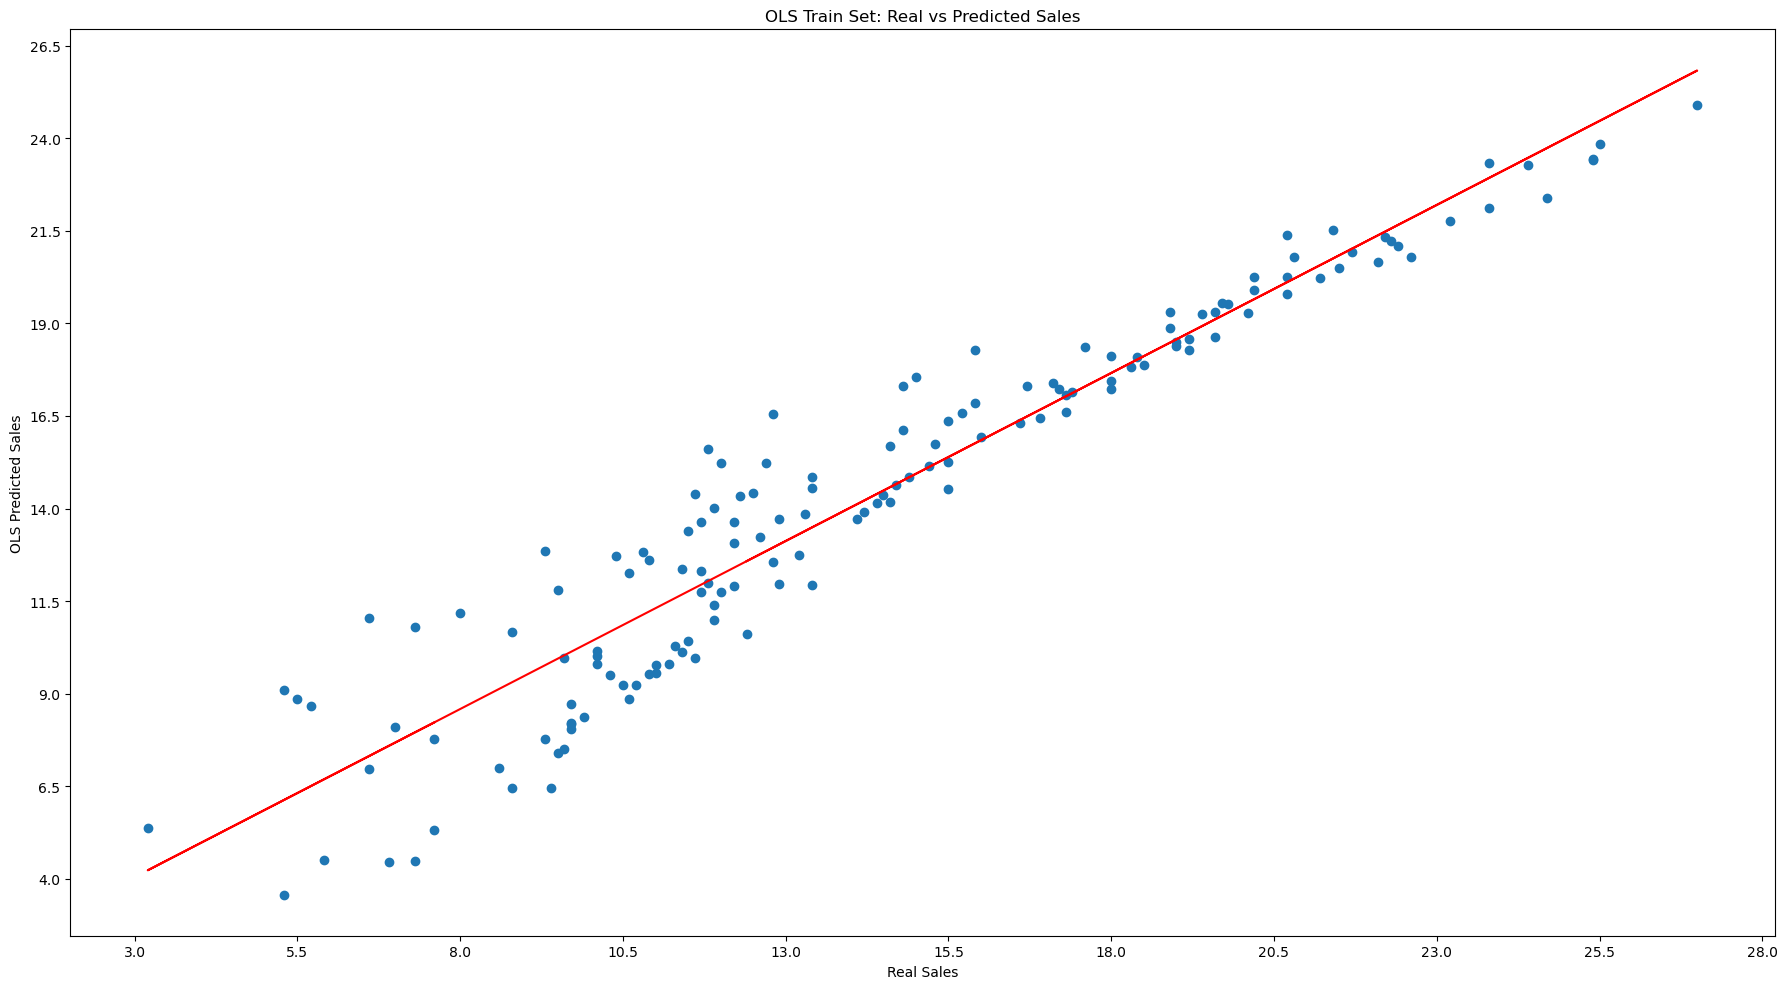

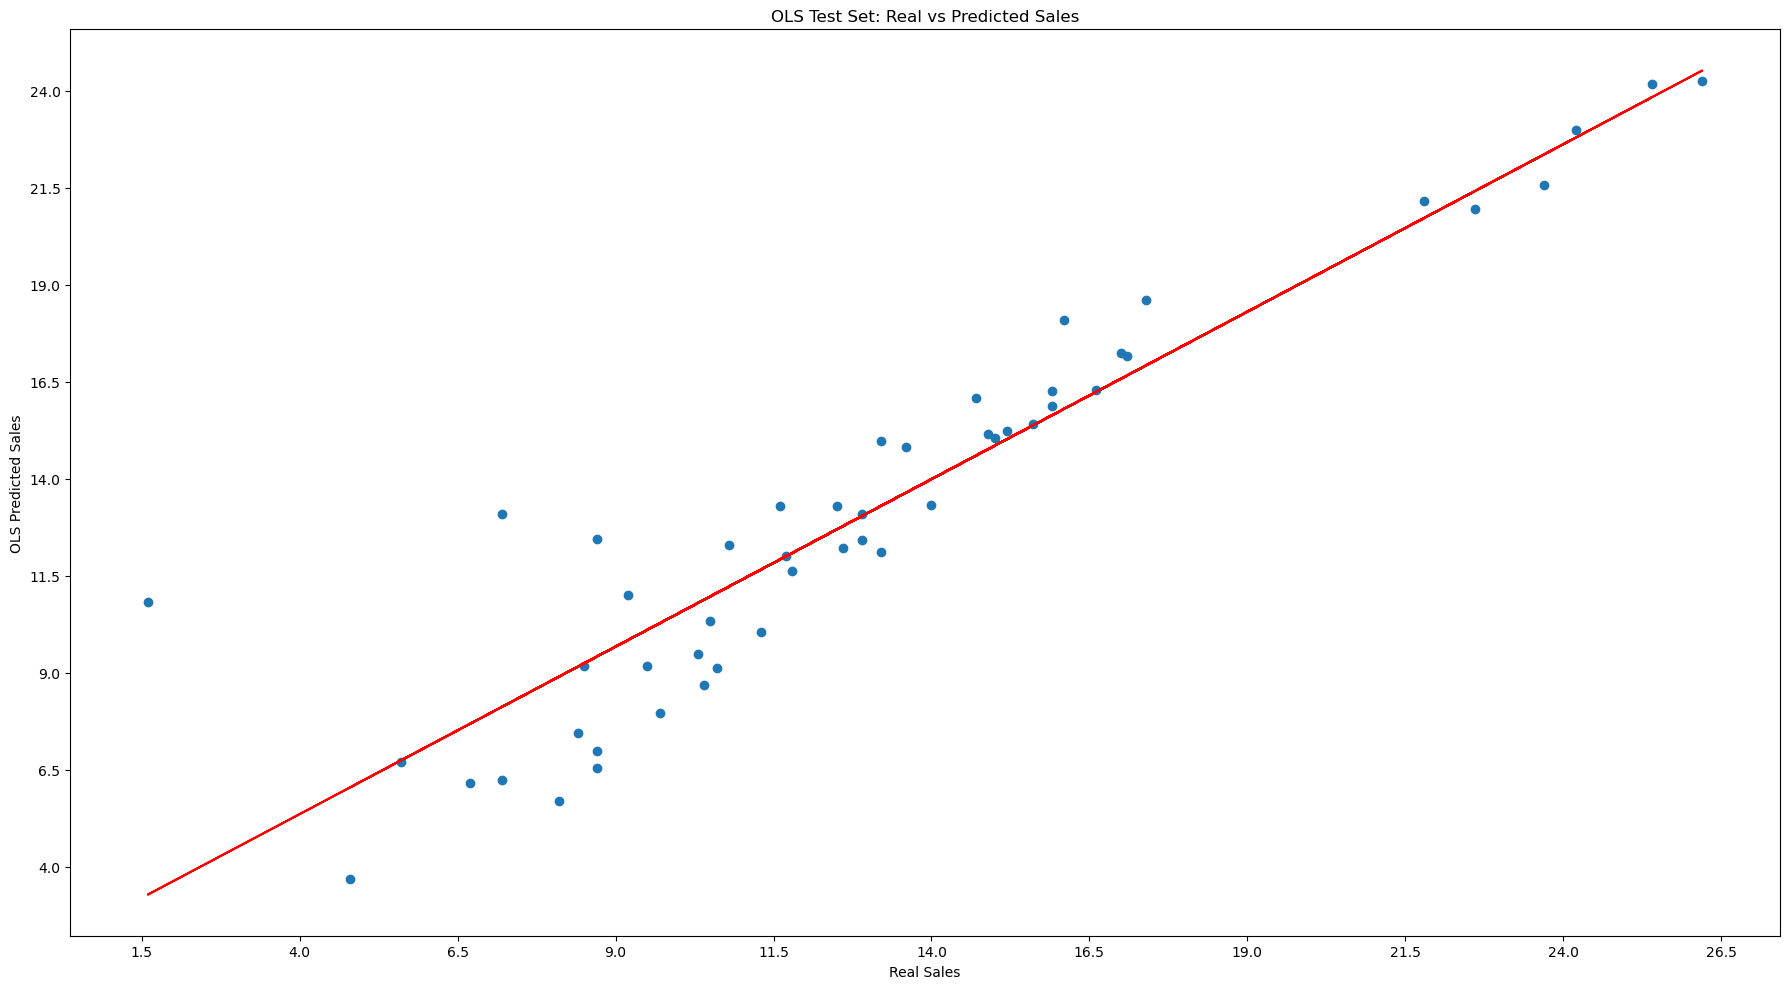

In [422]:
# plot train set
plt.scatter(y_train, ols_y_train_pred)
plt.title('OLS Train Set: Real vs Predicted Sales')
plt.xlabel('Real Sales')
plt.ylabel('OLS Predicted Sales')
plt.xticks(np.arange((round(min(y_train))) -sales_step, (round(max(y_train), 2)) +sales_step, step =sales_step))
plt.yticks(np.arange((round(min(ols_y_train_pred))) -sales_step, (round(max(ols_y_train_pred), 2)) +sales_step, step =sales_step))
m, b = np.polyfit(y_train, ols_y_train_pred, 1)
plt.plot(y_train, m*y_train + b, color='red')
plt.tight_layout()
plt.show()

# plot test set
plt.scatter(y_test, ols_y_test_pred)
plt.title('OLS Test Set: Real vs Predicted Sales')
plt.xlabel('Real Sales')
plt.ylabel('OLS Predicted Sales')
plt.xticks(np.arange((round(min(y_test))) - 0.50, (round(max(y_test), 2)) +sales_step, step =sales_step))
plt.yticks(np.arange((round(min(ols_y_test_pred))) -sales_step, (round(max(ols_y_test_pred), 2)) +sales_step, step =sales_step))
m, b = np.polyfit(y_test, ols_y_test_pred, 1)
plt.plot(y_test, m*y_test + b, color='red')
plt.tight_layout()
plt.show()

In [426]:
# store results
results = {
    'Method': ['OLS', 'Gradient Descent'],
    'Bias': [ols.intercept_, weights[0]],
    'TV': [ols.coef_[1], weights[1]],
    'Radio': [ols.coef_[2], weights[2]],
    'Newspaper': [ols.coef_[3], weights[3]],
    'MSE Train': [ols_mse_train, gd_mse_train],
    'MSE Test': [ols_mse_test, gd_mse_test],
    'R2 Train': [ols_r2_train, gd_r2_train],
    'R2 Test': [ols_r2_test, gd_r2_test]
}

# dataframe for display
results_df = pd.DataFrame(results)
results_df

,Method,Bias,TV,Radio,Newspaper,MSE Train,MSE Test,R2 Train,R2 Test
0,OLS,14.0514579961,3.7915245422,2.9545696683,0.0253215296,1.2194587467,2.0062487615,0.9072183331,0.8576396745
1,Gradient Descent,14.0514585287,3.7915233280,2.9545668466,0.0253244725,1.2194587467,2.0062486963,0.9072183331,0.8576396792


In [428]:
# difference in results between the two methods
print('OLS - Gradient Descent')
print('Bias     :', ols.intercept_ - weights[0])
print('TV       :', ols.coef_[1] - weights[1])
print('Radio    :', ols.coef_[2] - weights[2])
print('Newspaper:', ols.coef_[3] - weights[3])
print('MSE Train:', ols_mse_train - gd_mse_train)
print('MSE  Test:', ols_mse_test - gd_mse_test)
print('R2  Train:', ols_r2_train - gd_r2_train)
print('R2   Test:', ols_r2_test - gd_r2_test)

OLS - Gradient Descent
Bias     : -5.326109917547228e-07
TV       : 1.214198948051859e-06
Radio    : 2.8217526701901363e-06
Newspaper: -2.9428957788214805e-06
MSE Train: -5.933697977411612e-12
MSE  Test: 6.515968431486385e-08
R2  Train: 4.5152770411505116e-13
R2   Test: -4.623631033595643e-09


The result from OLS and Gradient Descent seems to be largely the same; although, OLS has marginally better results on the train set and GD on the test set. This attests to the success of my GD implementation since it concluded with matching results as scikitlearn's OLS. The corroboration of these results indicate that they both have reached the same minimum, possibly the global minimum, in predicting the dataset.